<a href="https://colab.research.google.com/github/hadeyema/playground-6psrqy2u/blob/master/P5Mod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Consignes projet 5 Anticipez les besoins en consommation électrique de bâtiments**
Lien vers données : https:https://www.kaggle.com/olistbr/brazilian-ecommerce?select=olist_customers_dataset.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import folium
import seaborn as sns
import numpy as np
import pickle

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

pd.set_option("display.max_rows", 101)
pd.options.display.max_columns = 999

In [2]:
data = pd.read_csv('/content/data_cleaned.csv')

In [3]:
data.head()

,customer_unique_id,Cat_la_plus_achetee,customer_zip_code_prefix,customer_city,customer_state,Nb_pdts,Tot_moy_achats,Delai_Moy_Commande,order_purchase_timestamp,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Moy_Paiment,Facilités,geolocation_lat,geolocation_lng,"('price', 'home')","('price', 'appliances')","('price', 'construction')","('price', 'office')","('price', 'electronics')","('price', 'arts')","('price', 'fashion')","('price', 'health_beauty')","('price', 'sports_leisure')","('price', 'garden_pets')","('price', 'auto')","('price', 'food_drinks')","('price', 'other')"
0,0000366f3b9a7992bf8c76cfdf3221e2,home,7787,Other,SP,1.0,4.866765,7.0,2018-05-10 10:56:27,10.0,3.0,115.0,5.0,credit_card,8.0,-23.340262,-46.831085,129.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,health_beauty,6053,osasco,SP,1.0,2.939162,4.0,2018-05-07 11:11:27,11.0,0.0,118.0,4.0,credit_card,1.0,-23.559044,-46.788516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.9,0.0,0.0,0.0,0.0,0.0
2,0000f46a3911fa3c0805444483337064,office,88115,sao jose,SC,1.0,4.234107,26.0,2017-03-10 21:05:03,21.0,4.0,541.0,3.0,credit_card,8.0,-27.543010,-48.634938,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0004aac84e0df4da2b147fca70cf8255,electronics,18040,sorocaba,SP,1.0,5.192957,14.0,2017-11-14 19:45:42,19.0,1.0,292.0,5.0,credit_card,6.0,-23.505588,-47.469820,0.0,0.0,0.0,0.0,180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0004bd2a26a76fe21f786e4fbd80607f,garden_pets,5036,sao paulo,SP,1.0,5.036953,2.0,2018-04-05 19:33:16,19.0,3.0,150.0,4.0,credit_card,8.0,-23.515693,-46.690031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,154.0,0.0,0.0,0.0


In [4]:
data.shape

(75231, 30)

In [5]:
data.isna().sum(axis=0)

customer_unique_id             0
Cat_la_plus_achetee            0
customer_zip_code_prefix       0
customer_city                  0
customer_state                 0
Nb_pdts                        0
Tot_moy_achats                 0
Delai_Moy_Commande             0
order_purchase_timestamp       0
heure_achat                    0
jour_achat                     0
delai_dernier_achat            0
Note_Moy_Com                   0
Moy_Paiment                    0
Facilités                      0
geolocation_lat                0
geolocation_lng                0
('price', 'home')              0
('price', 'appliances')        0
('price', 'construction')      0
('price', 'office')            0
('price', 'electronics')       0
('price', 'arts')              0
('price', 'fashion')           0
('price', 'health_beauty')     0
('price', 'sports_leisure')    0
('price', 'garden_pets')       0
('price', 'auto')              0
('price', 'food_drinks')       0
('price', 'other')             0
dtype: int

In [6]:
data.set_index('customer_unique_id', inplace=True)

In [7]:
data

,Cat_la_plus_achetee,customer_zip_code_prefix,customer_city,customer_state,Nb_pdts,Tot_moy_achats,Delai_Moy_Commande,order_purchase_timestamp,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Moy_Paiment,Facilités,geolocation_lat,geolocation_lng,"('price', 'home')","('price', 'appliances')","('price', 'construction')","('price', 'office')","('price', 'electronics')","('price', 'arts')","('price', 'fashion')","('price', 'health_beauty')","('price', 'sports_leisure')","('price', 'garden_pets')","('price', 'auto')","('price', 'food_drinks')","('price', 'other')"
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,home,7787,Other,SP,1.0,4.866765,7.0,2018-05-10 10:56:27,10.0,3.0,115.0,5.0,credit_card,8.0,-23.340262,-46.831085,129.9,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,health_beauty,6053,osasco,SP,1.0,2.939162,4.0,2018-05-07 11:11:27,11.0,0.0,118.0,4.0,credit_card,1.0,-23.559044,-46.788516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.90,0.0,0.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,office,88115,sao jose,SC,1.0,4.234107,26.0,2017-03-10 21:05:03,21.0,4.0,541.0,3.0,credit_card,8.0,-27.543010,-48.634938,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,electronics,18040,sorocaba,SP,1.0,5.192957,14.0,2017-11-14 19:45:42,19.0,1.0,292.0,5.0,credit_card,6.0,-23.505588,-47.469820,0.0,0.0,0.0,0.0,180.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
0004bd2a26a76fe21f786e4fbd80607f,garden_pets,5036,sao paulo,SP,1.0,5.036953,2.0,2018-04-05 19:33:16,19.0,3.0,150.0,4.0,credit_card,8.0,-23.515693,-46.690031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,154.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffb09418989a0dbff854a28163e47c6,fashion,95330,Other,RS,1.0,4.060443,9.0,2017-12-17 19:14:35,19.0,6.0,259.0,5.0,boleto,1.0,-28.937008,-51.549726,0.0,0.0,0.0,0.0,0.0,0.0,58.0,0.00,0.0,0.0,0.0,0.0,0.0
fffea47cd6d3cc0a88bd621562a9d061,health_beauty,44054,feira de santana,BA,1.0,4.172694,31.0,2017-12-10 20:07:56,20.0,6.0,266.0,4.0,credit_card,1.0,-12.217900,-38.959237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.89,0.0,0.0,0.0,0.0,0.0
ffff371b4d645b6ecea244b27531430a,auto,78552,Other,MT,1.0,4.498698,15.0,2017-02-07 15:49:16,15.0,1.0,572.0,5.0,credit_card,1.0,-11.834705,-55.508145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,89.9,0.0,0.0


In [8]:
data.columns

Index(['Cat_la_plus_achetee', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'Nb_pdts', 'Tot_moy_achats', 'Delai_Moy_Commande',
       'order_purchase_timestamp', 'heure_achat', 'jour_achat',
       'delai_dernier_achat', 'Note_Moy_Com', 'Moy_Paiment', 'Facilités',
       'geolocation_lat', 'geolocation_lng', '('price', 'home')',
       '('price', 'appliances')', '('price', 'construction')',
       '('price', 'office')', '('price', 'electronics')', '('price', 'arts')',
       '('price', 'fashion')', '('price', 'health_beauty')',
       '('price', 'sports_leisure')', '('price', 'garden_pets')',
       '('price', 'auto')', '('price', 'food_drinks')', '('price', 'other')'],
      dtype='object')

In [9]:
data['order_purchase_timestamp'] = data['order_purchase_timestamp'].astype(
    'datetime64')

In [10]:
data.dtypes

Cat_la_plus_achetee                    object
customer_zip_code_prefix                int64
customer_city                          object
customer_state                         object
Nb_pdts                               float64
Tot_moy_achats                        float64
Delai_Moy_Commande                    float64
order_purchase_timestamp       datetime64[ns]
heure_achat                           float64
jour_achat                            float64
delai_dernier_achat                   float64
Note_Moy_Com                          float64
Moy_Paiment                            object
Facilités                             float64
geolocation_lat                       float64
geolocation_lng                       float64
('price', 'home')                     float64
('price', 'appliances')               float64
('price', 'construction')             float64
('price', 'office')                   float64
('price', 'electronics')              float64
('price', 'arts')                 

In [11]:
data.select_dtypes(['object']).nunique()

Cat_la_plus_achetee    12
customer_city          98
customer_state         22
Moy_Paiment             4
dtype: int64

In [12]:
data.drop(['customer_zip_code_prefix','Cat_la_plus_achetee','customer_city', 'customer_state'], 
          axis=1, 
          inplace=True)

In [13]:
data.select_dtypes(['object']).nunique()

Moy_Paiment    4
dtype: int64

# **Préparation des données**

In [14]:
data_reduce = data.sample(10000, random_state=1).copy()
X = data_reduce.copy()
categorical_columns = X.select_dtypes(['category','object']).columns
numerical_columns = X.select_dtypes(['int32','float64']).columns

ohe = OneHotEncoder(sparse=False)
ss = StandardScaler()
X[numerical_columns] = ss.fit_transform(X[numerical_columns])
ohe.fit(X[categorical_columns])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [15]:
X = pd.merge(X[numerical_columns], 
          pd.DataFrame(columns = ohe.get_feature_names().tolist(),
              data = ohe.fit_transform(X[categorical_columns])).set_index(X.index),
        left_index = True, right_index = True)

## **PCA Transformation**

In [16]:
pca = PCA(random_state=1)

In [17]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=1,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
print (pca.explained_variance_ratio_)

[8.41672254e-02 7.56764233e-02 6.57895063e-02 5.27299231e-02
 4.93673400e-02 4.79372427e-02 4.77308937e-02 4.68812565e-02
 4.66411069e-02 4.62804019e-02 4.60055730e-02 4.57268580e-02
 4.51877519e-02 4.46412301e-02 4.42253460e-02 4.36220593e-02
 4.06280619e-02 3.46935211e-02 3.20087850e-02 2.42463532e-02
 1.78802774e-02 1.11892808e-02 4.79708310e-03 1.27431949e-03
 6.72180168e-04 1.65990584e-32 5.02983997e-34]


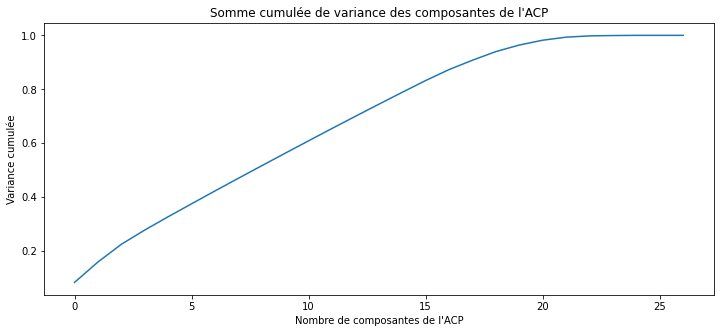

In [19]:
plt.figure(figsize=(12,5))
plt.title('Somme cumulée de variance des composantes de l\'ACP')
plt.xlabel('Nombre de composantes de l\'ACP')
plt.ylabel('Variance cumulée')
plt.plot(list(range(X.shape[1])),
         np.cumsum(pca.explained_variance_ratio_))

In [20]:
np.cumsum(pca.explained_variance_ratio_)[18]

0.9399405058611519

Nous avons 96 % de la variance totale avec 19 features

In [21]:
colonnes_pca = X.columns

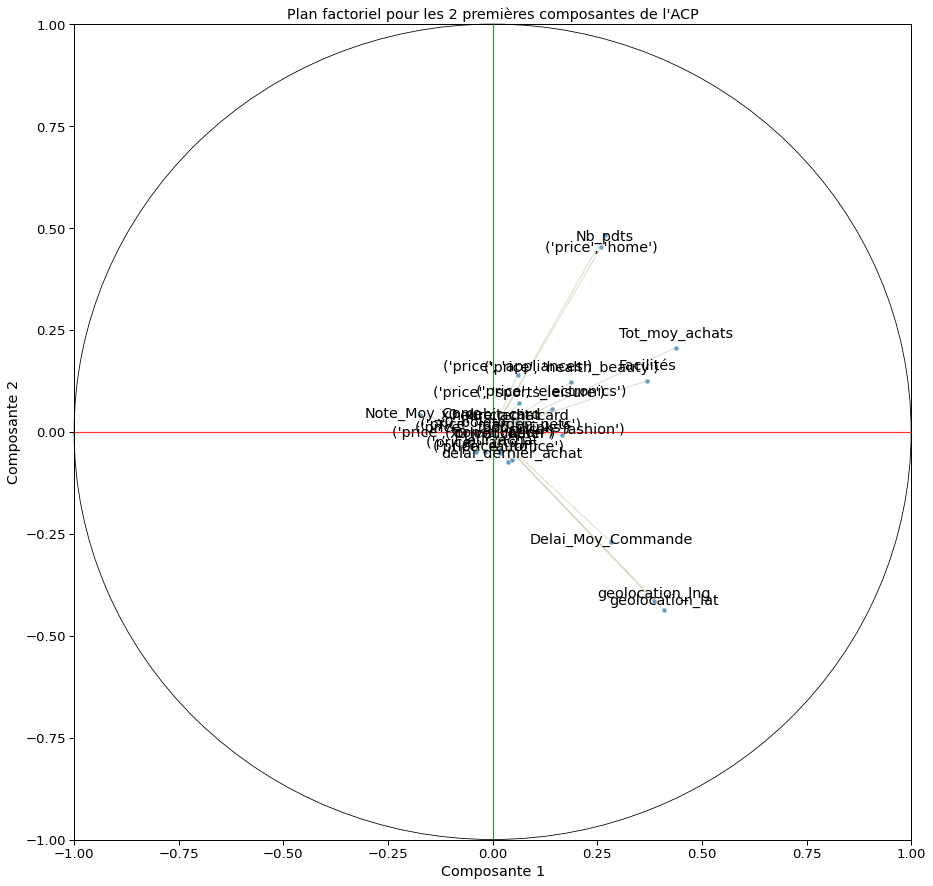

In [22]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(15,15))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()
ax.add_patch(Circle([0,0], radius=1, color='black', fill=False, linestyle='-', 
                    clip_on=False))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
x_pca = pca.components_[0,:]
y_pca = pca.components_[1,:]

sns.scatterplot(x = x_pca,
                y = y_pca,
               alpha = 0.7)
plt.plot([-1,1],[0,0], color='red', alpha=0.8)
plt.plot([0,0],[-1,1], color='green', alpha=0.8)

i = 0
for x,y,colonne in zip(x_pca,y_pca, colonnes_pca):

    plt.annotate(colonne, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,5+np.random.randint(-10,10)),
                 ha='center') 
    ax.arrow(0, 0, x, y, head_width=0, head_length=0, fc='yellow', ec='grey',
             alpha=0.2)


sns.set_context("paper", font_scale=1)

In [23]:
x_show = pca.transform(X.select_dtypes(['float64','int32']))[:,0]

y_show = pca.transform(X.select_dtypes(['float64','int32']))[:,1]

z_show = pca.transform(X.select_dtypes(['float64','int32']))[:,2]

In [24]:
X_pca = pca.transform(X)[:,:19]

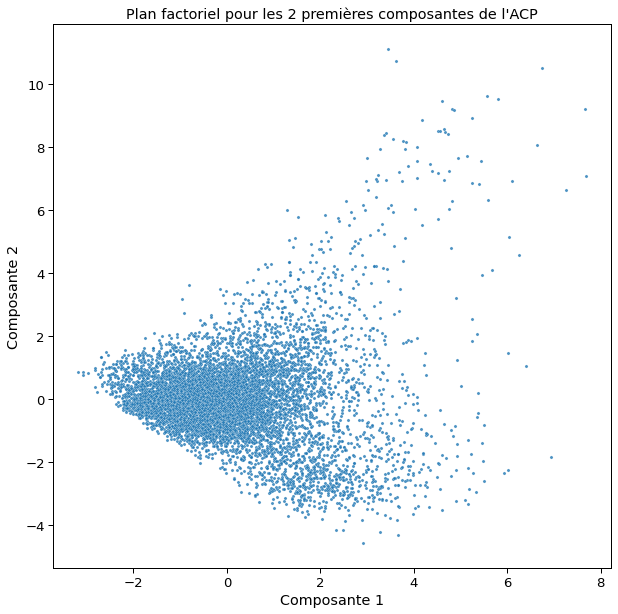

In [25]:
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()

sns.scatterplot(x = x_show,
                y = y_show,
                #hue = hue_show,
                alpha=0.8, s=10)

sns.set_context("paper", font_scale=1)

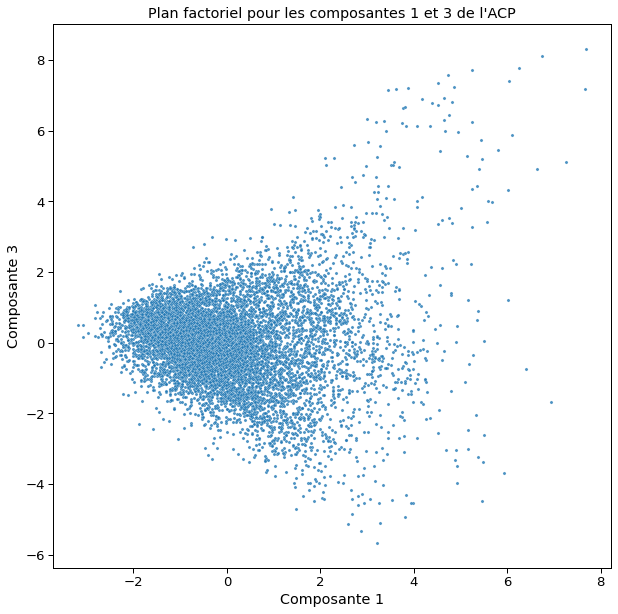

In [26]:
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour les composantes 1 et 3 de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 3')
ax = plt.gca()

sns.scatterplot(x = x_show,
                y = z_show,
                #hue = hue_show,
                alpha=0.8, s=10)
sns.set_context("paper", font_scale=1)

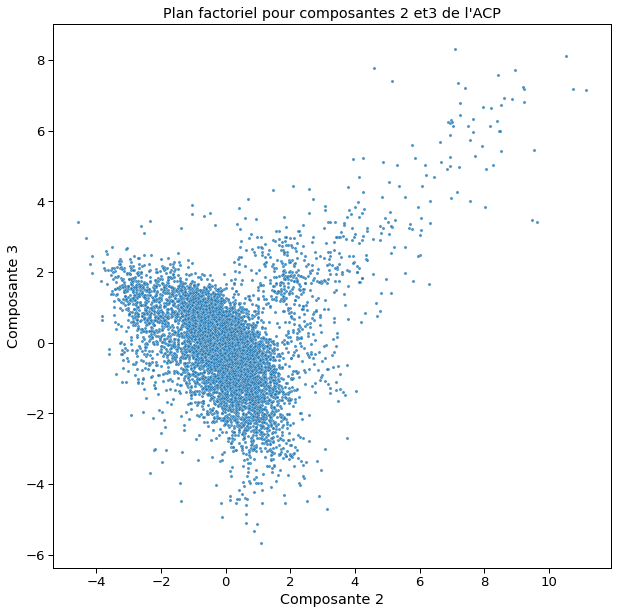

In [27]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour composantes 2 et3 de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 2')
plt.ylabel('Composante 3')
ax = plt.gca()

sns.scatterplot(x = y_show,
                y = z_show,
                #hue = hue_show,
                alpha=0.8, s=10)

sns.set_context("paper", font_scale=1)

## **T-SNE**

In [28]:
tsne = TSNE(n_components=2)
T = tsne.fit_transform(X_pca.copy())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


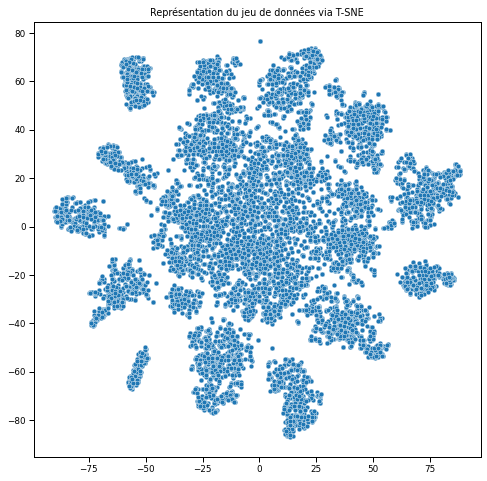

In [29]:
plt.figure(figsize=(8,8))
plt.title('Représentation du jeu de données via T-SNE')
sns.scatterplot(T[:,0], T[:,1])

# **Kmeans**

Premier essai

In [30]:
kmeans = KMeans(n_clusters=5, 
                verbose=1, 
                random_state=0,
               n_jobs=-1).fit(X_pca)

In [31]:
kmeans.labels_

array([2, 2, 2, ..., 1, 1, 3], dtype=int32)

**Recherche d'un optimum du nombre de clusters**

NB : intertia = Sum of squared distances of samples to their closest cluster center.

1 sample

In [32]:
inertia = {}
dict_kmeans = {}
for k in range(1,25):
    print(k)
    kmeans = KMeans(n_clusters=k,
                   verbose=1,
                   random_state=0,
                   n_jobs=-1).fit(X_pca)
    inertia[k] = kmeans.inertia_
    dict_kmeans[k] = kmeans

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


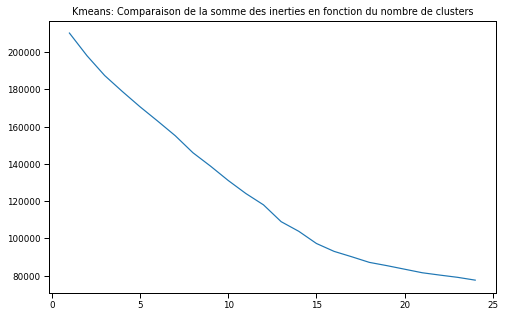

In [33]:
plt.figure(figsize=(8,5))
plt.title('Kmeans: Comparaison de la somme des inerties en fonction du nombre de clusters')
sns.lineplot(list(inertia.keys()),
             list(inertia.values())
            )

n samples

In [34]:
inertia = {}
dict_kmeans = {}

nb_boucles=3
max_clusters = 25

for k in range(1,nb_boucles+1):
    print('Boucle ',k)
    for i in range(1,max_clusters+1):
        kmeans = KMeans(n_clusters=i,
                       verbose=1,
                       n_jobs=-1).fit(X_pca)
        inertia[(k,i)] = kmeans.inertia_
        dict_kmeans[k,i] = kmeans

Boucle  1
Boucle  2
Boucle  3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


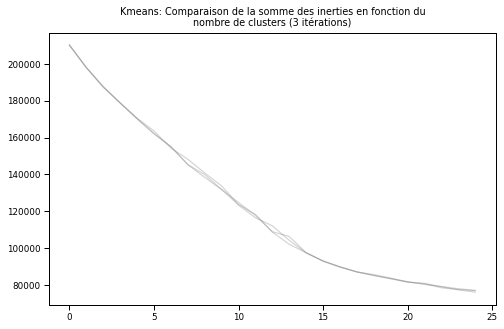

In [35]:
chaine = 'Kmeans: Comparaison de la somme des inerties en fonction du\nnombre de clusters (' + str(nb_boucles) + ' itérations)'
plt.figure(figsize=(8,5))
plt.title(chaine)
for i in range(0,nb_boucles):
    index_plot = [cluster+i*(max_clusters) for cluster in list(range(0,max_clusters))][0:max_clusters]
    sous_liste = [list(inertia.values())[index] for index in index_plot]
    sns.lineplot(list(range(0,max_clusters)),
                 sous_liste, alpha=1/nb_boucles, color='grey')

**Coefficient de silhouette**

In [36]:
silhouettes_kmeans = {}
for i in range(2,max_clusters):
    silhouettes_kmeans[i] = silhouette_score(X = X_pca,
                                             labels= list(dict_kmeans[(1,i)].labels_))

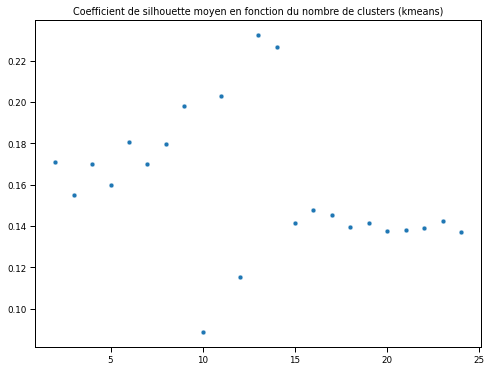

In [37]:
plt.figure(figsize=(8,6)),
plt.title('Coefficient de silhouette moyen en fonction du nombre de clusters (kmeans)')
sns.scatterplot(x = list(silhouettes_kmeans.keys()),
               y = list(silhouettes_kmeans.values()))
plt.show()

In [38]:
for key, value in silhouettes_kmeans.items():
    if value == max(silhouettes_kmeans.values()):
        print('le coefficient de silhouette est maximal pour {} clusters (score = {})'.format(key, value))
        nb_clusters = key

le coefficient de silhouette est maximal pour 13 clusters (score = 0.23233790239362698)


In [39]:
nb_clusters

13

**Indice de Davies Bouldin**

In [40]:
davies_bouldin_kmeans = {}
for i in range(2,max_clusters):
    davies_bouldin_kmeans[i] = davies_bouldin_score(X = X_pca,
                                             labels= list(dict_kmeans[(1,i)].labels_))

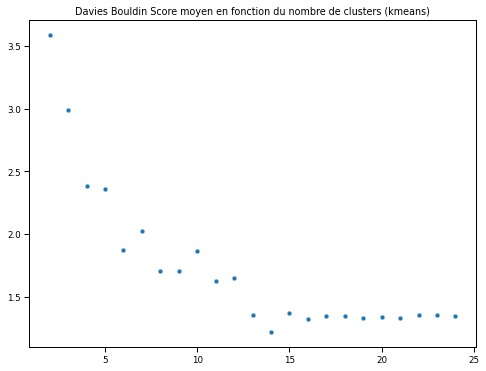

In [41]:
plt.figure(figsize=(8,6)),
plt.title('Davies Bouldin Score moyen en fonction du nombre de clusters (kmeans)')
sns.scatterplot(x = list(davies_bouldin_kmeans.keys()),
               y = list(davies_bouldin_kmeans.values()))
plt.show()

In [42]:
for key, value in davies_bouldin_kmeans.items():
    if value == min(davies_bouldin_kmeans.values()):
        print('le score de Davies Bouldin est minimal pour {} clusters (score = {})'.format(key, value))

le score de Davies Bouldin est minimal pour 14 clusters (score = 1.2193489518950706)


#**DBScan**

**Application**

In [43]:
dbs = DBSCAN(eps = 1, 
             min_samples=5,
               n_jobs=-1).fit(X_pca.copy())

**Représentation des variables**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


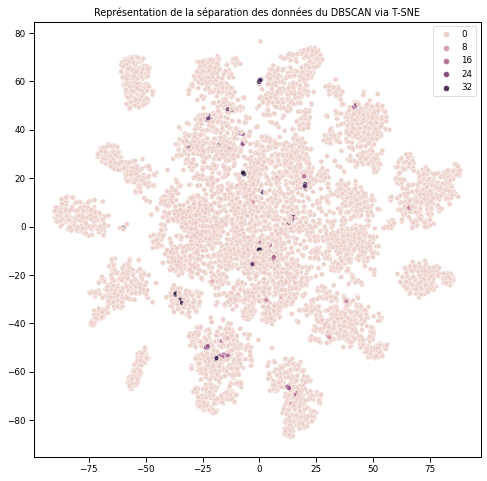

In [44]:
plt.figure(figsize=(8,8))
plt.title('Représentation de la séparation des données du DBSCAN via T-SNE')
sns.scatterplot(T[:,0], T[:,1], dbs.labels_)

**Clustering Hiérarchique**

In [45]:
nb_clusters_agg = nb_clusters

In [46]:
cah = AgglomerativeClustering(n_clusters = nb_clusters_agg
                             ).fit(X_pca.copy())

In [47]:
graph = pd.DataFrame(data = [T[:,0], T[:,1], dict_kmeans[(1,11)].labels_]).T
graph.columns = ['X', 'Y', 'label_kmeans']

In [48]:
graph['x_pca'] = x_show
graph['y_pca'] = y_show
graph['z_pca'] = z_show

In [49]:
graph

,X,Y,label_kmeans,x_pca,y_pca,z_pca
0,-17.021605,15.139656,0.0,-1.107281,0.344871,0.258000
1,13.524854,-70.345589,10.0,-0.451527,-0.915412,0.129025
2,6.943631,53.324265,0.0,-1.005317,0.920084,-0.437198
3,-50.635914,-24.245131,0.0,-1.724891,0.041029,0.445379
4,-34.805862,-32.173737,0.0,-0.513379,0.012798,-0.294107
...,...,...,...,...,...,...
9995,17.944939,51.094112,0.0,-0.281168,-0.189982,0.661445
9996,24.721882,65.955414,7.0,1.959770,2.156177,-1.591201
9997,-13.972957,-55.013397,7.0,-0.433382,0.389087,-0.678298
9998,-60.693642,64.032967,6.0,1.262648,0.104313,-2.005125


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


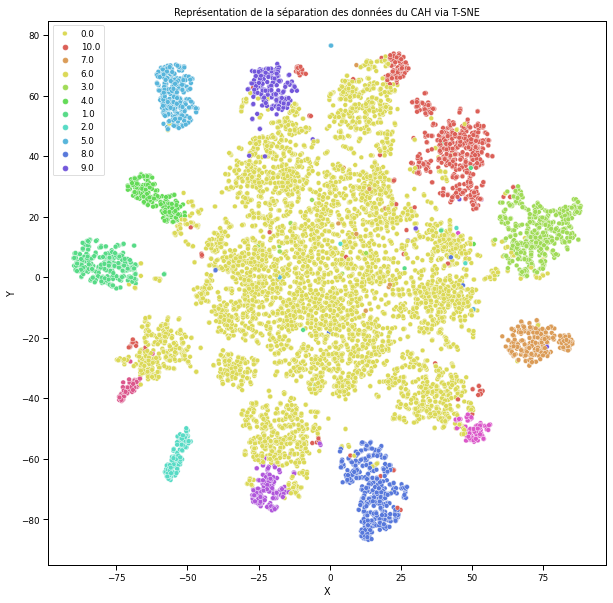

In [50]:
plt.figure(figsize=(10,10))
plt.title('Représentation de la séparation des données du CAH via T-SNE')
sns.scatterplot(graph['X'], 
                graph['Y'], 
                hue = cah.labels_, 
                legend='full',
               palette=sns.color_palette("hls",nb_clusters_agg))
plt.legend(loc='upper left', labels=graph['label_kmeans'].unique())
plt.show()

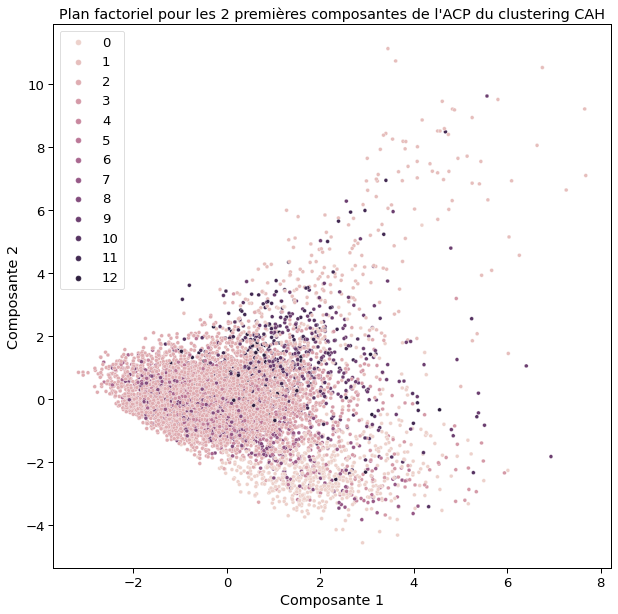

In [51]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP\
 du clustering CAH"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()

sns.scatterplot(x = graph['x_pca'], 
                y = graph['y_pca'], 
                hue = cah.labels_,
                alpha=1, s=15, legend='full')

sns.set_context("paper", font_scale=1)

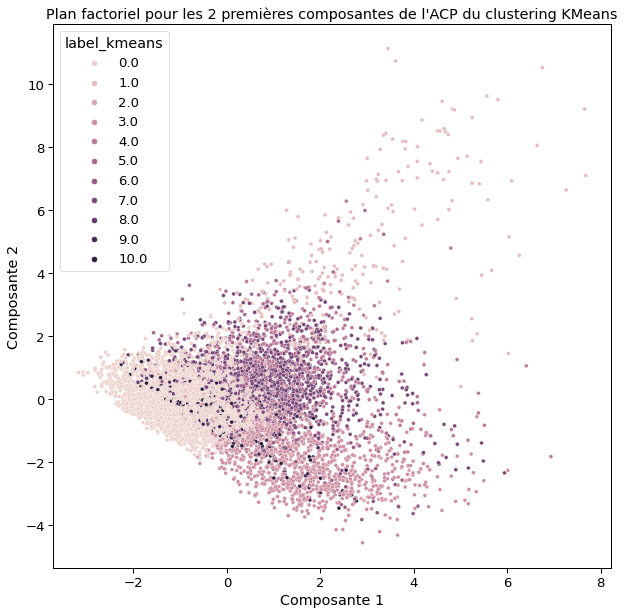

In [52]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP \
du clustering KMeans"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()

sns.scatterplot(x = graph['x_pca'], 
                y = graph['y_pca'], 
                hue = graph['label_kmeans'],
                alpha=1, s=15, legend='full')

sns.set_context("paper", font_scale=1)

In [53]:
silhouette_score(X = X_pca, labels= cah.labels_)

0.23859920035271034

**Conclusion**

Le Kmeans semble mieux fonctionner que les autres méthodes de clustering, essayons d'appliquer cet algorithme à l'ensemble du jeu de données.

# **Ensemble du jeu de données**
**Préparation jeu de donnée complet**

In [54]:
X_tot=data.copy()

categorical_columns = X_tot.select_dtypes(['category','object']).columns
numerical_columns = X_tot.select_dtypes(['int32','float64']).columns

ohe = OneHotEncoder(sparse=False)
ss = StandardScaler()
X_tot[numerical_columns] = ss.fit_transform(X_tot[numerical_columns])
ohe.fit(X_tot[categorical_columns])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [55]:
X_tot = pd.merge(X_tot[numerical_columns], 
          pd.DataFrame(columns = ohe.get_feature_names().tolist(),
              data = ohe.fit_transform(X_tot[categorical_columns])).set_index(X_tot.index),
        left_index = True, right_index = True)

**PCA**

In [56]:
pca_tot = PCA(random_state=1)

In [57]:
pca_tot.fit(X_tot)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=1,
    svd_solver='auto', tol=0.0, whiten=False)

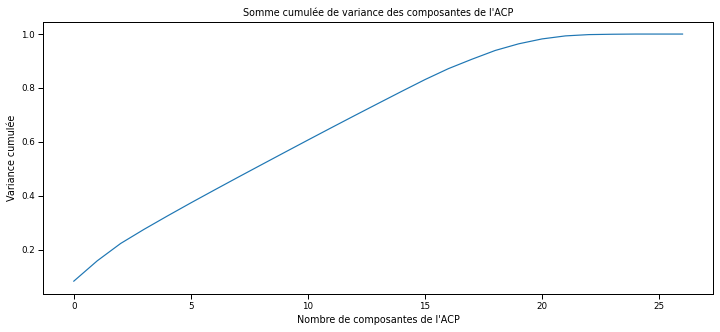

In [58]:
plt.figure(figsize=(12,5))
plt.title('Somme cumulée de variance des composantes de l\'ACP')
plt.xlabel('Nombre de composantes de l\'ACP')
plt.ylabel('Variance cumulée')
plt.plot(list(range(X_tot.shape[1])),
         np.cumsum(pca_tot.explained_variance_ratio_))

In [59]:
np.cumsum(pca_tot.explained_variance_ratio_)[18]

0.9391681609241471

On a 95 % de variance avec 19 features

In [60]:
X_pca_tot = pca_tot.transform(X_tot)[:,:18]

In [61]:
colonnes_pca = X_tot.columns

**Représentation des données**

In [62]:
x_show = pca_tot.transform(X_tot.select_dtypes(['float64','int32']))[:,0]

y_show = pca_tot.transform(X_tot.select_dtypes(['float64','int32']))[:,1]

z_show = pca_tot.transform(X_tot.select_dtypes(['float64','int32']))[:,2]

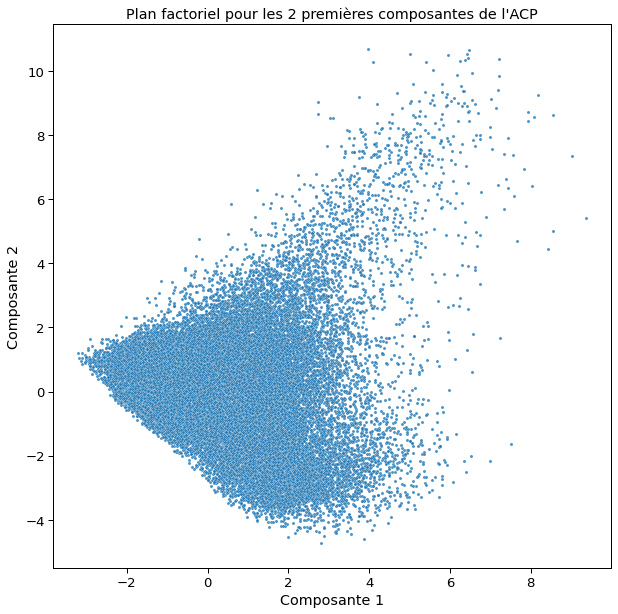

In [63]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()

sns.scatterplot(x = x_show,
                y = y_show,
                #hue = hue_show,
                alpha=0.8, s=10)


i = 0
'''for x,y,colonne in zip(x_pca,y_pca, colonnes_pca):

    plt.annotate(colonne, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5+np.random.randint(-10,10)), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    ax.arrow(0, 0, x, y, head_width=0, head_length=0, fc='grey', ec='grey',alpha=0.2)'''


sns.set_context("paper", font_scale=1)

**KMeans**

Modèle KMeans avec le nombre de clusters optimal identifié sur le jeu de données réduit

In [64]:
kmeans = KMeans(n_clusters=14, 
                verbose=1, 
                random_state=0,
               n_jobs=-1).fit(X_pca_tot)

In [65]:
kmeans.labels_.shape

(75231,)

In [66]:
silhouette_score(X = X_pca_tot, labels= kmeans.labels_)

0.23807821705876858

In [67]:
inertia = {}
dict_kmeans = {}
dict_silhouette = {}
for k in range(13,16):
    kmeans = KMeans(n_clusters=k,
                   verbose=1,
                   random_state=0,
                   n_jobs=-1).fit(X_pca_tot)
    inertia[k] = kmeans.inertia_
    dict_kmeans[k] = kmeans
    dict_silhouette[k] = silhouette_score(X = X_pca_tot, labels= kmeans.labels_)
    print('Boucle {} - Silhouette score : {}'.format(k, dict_silhouette[k]))

Boucle 13 - Silhouette score : 0.22932771489537407
Boucle 14 - Silhouette score : 0.23807821705876858
Boucle 15 - Silhouette score : 0.14902548142680722


In [68]:
if False:
    inertia = {}
    dict_kmeans = {}
    dict_silhouette = {}
    for k in range(3,15):
        kmeans = KMeans(n_clusters=k,
                       verbose=1,
                       random_state=0,
                       n_jobs=-1).fit(X_pca_tot)
        inertia[k] = kmeans.inertia_
        dict_kmeans[k] = kmeans
        dict_silhouette[k] = silhouette_score(X = X_pca_tot, labels= kmeans.labels_)
        print('Boucle {} - Silhouette score : {}'.format(k, dict_silhouette[k]))


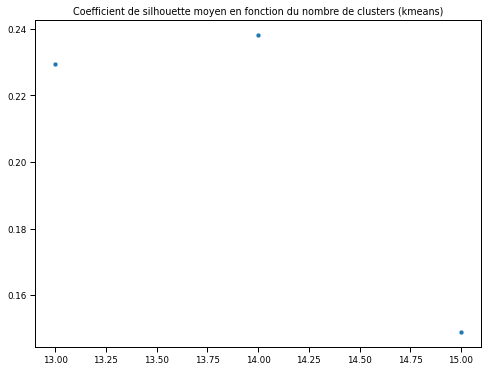

In [69]:
plt.figure(figsize=(8,6)),
plt.title('Coefficient de silhouette moyen en fonction du nombre de clusters (kmeans)')
sns.scatterplot(x = list(dict_silhouette.keys()),
               y = list(dict_silhouette.values()))
plt.show()

Le coefficient de silhouette est maximal pour 14 clusters

**Clustering hiérarchique**

In [70]:
from joblib import Memory
if False:
    cah_total = AgglomerativeClustering(n_clusters = 14, memory=Memory('/cache')
                             ).fit(X_pca_tot)

Non applicable (problème mémoire)

**Exports**

Exportons notre modèle et notre jeu de données

In [72]:
#export kmeans
filename = 'models\kmeans_14_full_dataset.obj' 
with  open(filename, 'wb') as filehandler :
    pickle.dump(dict_kmeans[14], filehandler)

In [73]:
#export OHE
filename = 'models\ohe.obj' 
with  open(filename, 'wb') as filehandler :
    pickle.dump(ohe, filehandler)
    
#export SS
filename = 'models\ss.obj' 
with  open(filename, 'wb') as filehandler :
    pickle.dump(ss, filehandler)
    
#export modèle PCA
filename = 'models\pca_tot.obj' 
with  open(filename, 'wb') as filehandler :
    pickle.dump(pca_tot, filehandler)

**Import**

In [76]:
file = open('models\kmeans_14_full_dataset.obj', 'rb')
model = pickle.load(file)

# **Représentation des variables**

In [77]:
nb_clusters = 14
if False:
    tsne = TSNE(n_components=2)
    T = tsne.fit_transform(X_pca_tot.copy())
    graph = pd.DataFrame(data = [T[:,0], T[:,1], model.labels_]).T
    graph.columns = ['X', 'Y', 'label']
    plt.figure(figsize=(10,10))
    plt.title('Représentation de la séparation des données du KMEANS via T-SNE')
    sns.scatterplot(graph['X'], graph['Y'], hue = graph['label'], legend='full',
                   palette=sns.color_palette("hls",14),
                    alpha=1, s=15,)
    plt.legend(loc='upper left', labels=graph['label'].unique())
    plt.show()
    
else:
        graph = pd.DataFrame(data = [model.labels_]).T
        graph.columns = ['label']

In [78]:
graph['x_pca'] = x_show
graph['y_pca'] = y_show
graph['z_pca'] = z_show

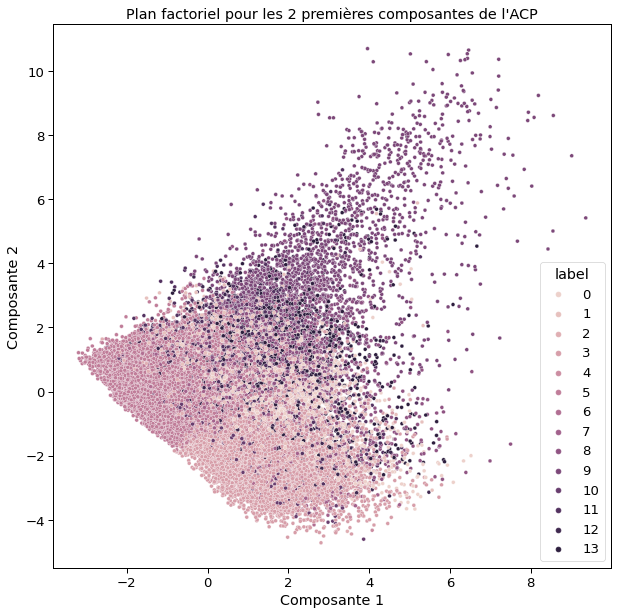

In [79]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()

sns.scatterplot(x = graph['x_pca'], 
                y = graph['y_pca'], 
                hue = graph['label'],
                alpha=1, s=15, legend='full')

sns.set_context("paper", font_scale=1)

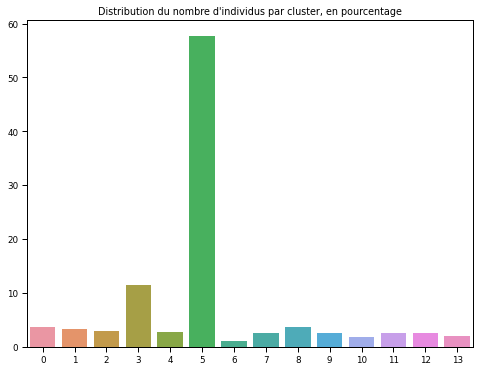

In [80]:
plt.figure(figsize=(8,6))
plt.title('Distribution du nombre d\'individus par cluster, en pourcentage')
sns.barplot(x = graph['label'].value_counts().index, 
           y=graph['label'].value_counts().values/len(graph)*100)

**Caractérisation des clusters**

**Représentation **

In [81]:
graph.sample(10)

,label,x_pca,y_pca,z_pca
4746,5,-1.022282,0.142367,-0.113278
60780,5,-0.322236,-0.541479,0.699498
12388,5,0.004704,0.343677,-0.309618
39648,9,0.783750,2.717049,1.479304
46522,5,-1.170089,-0.955350,1.717479
17222,5,-0.314907,-0.413823,0.232908
6724,5,0.457910,-0.512874,0.408808
30376,7,0.550211,-0.529997,-1.412054
19642,13,1.385388,2.450140,1.246350
9293,5,-1.335538,-0.385330,0.721554


In [82]:
X2=X_tot.copy()

In [83]:
X2.shape

(75231, 27)

In [84]:
X2['label'] = graph['label']
group_columns = X2.groupby('label').mean()

**Répartition par feature**

In [85]:
X_tot_2 = data.copy()
X_tot_2['label'] = model.labels_

In [86]:
X_tot_2.head(2)

,Nb_pdts,Tot_moy_achats,Delai_Moy_Commande,order_purchase_timestamp,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Moy_Paiment,Facilités,geolocation_lat,geolocation_lng,"('price', 'home')","('price', 'appliances')","('price', 'construction')","('price', 'office')","('price', 'electronics')","('price', 'arts')","('price', 'fashion')","('price', 'health_beauty')","('price', 'sports_leisure')","('price', 'garden_pets')","('price', 'auto')","('price', 'food_drinks')","('price', 'other')",label
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1.0,4.866765,7.0,2018-05-10 10:56:27,10.0,3.0,115.0,5.0,credit_card,8.0,-23.340262,-46.831085,129.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,2.939162,4.0,2018-05-07 11:11:27,11.0,0.0,118.0,4.0,credit_card,1.0,-23.559044,-46.788516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.9,0.0,0.0,0.0,0.0,0.0,5


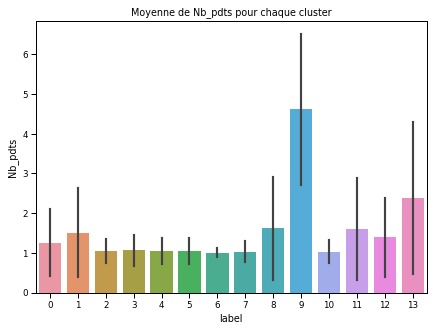

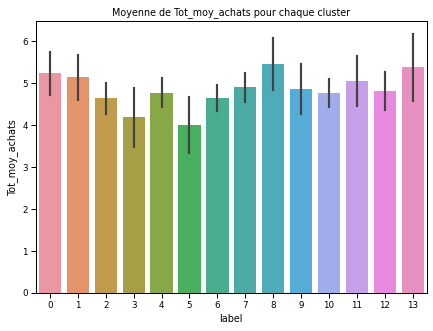

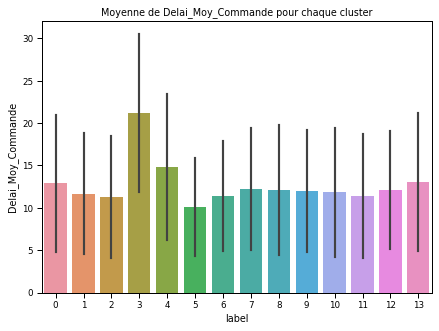

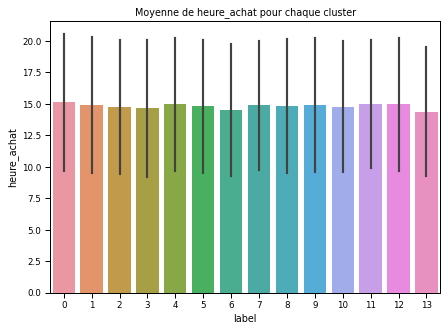

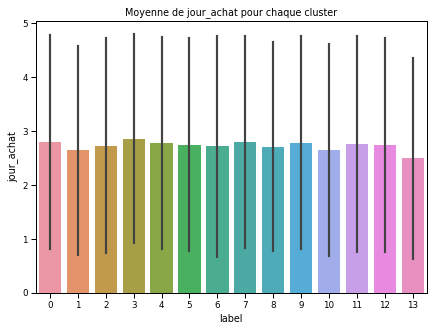

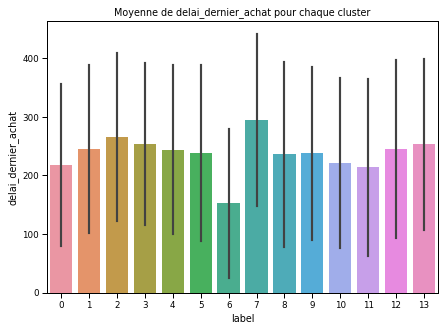

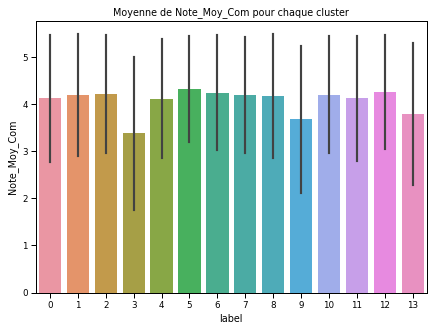

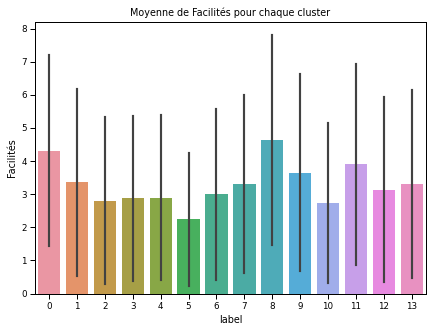

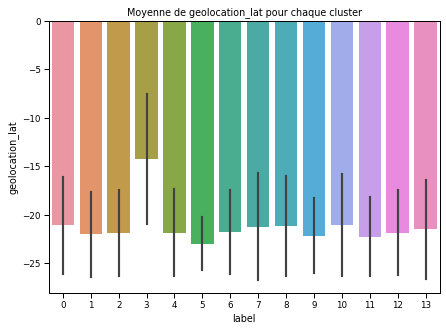

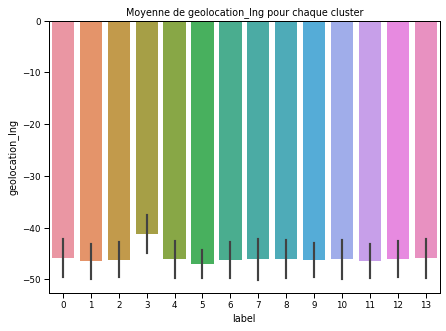

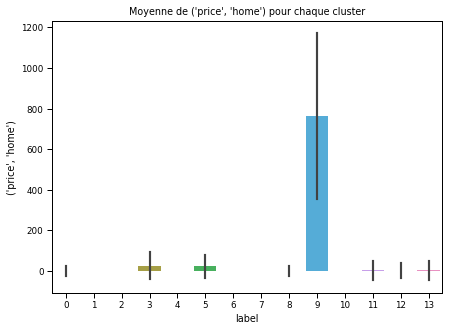

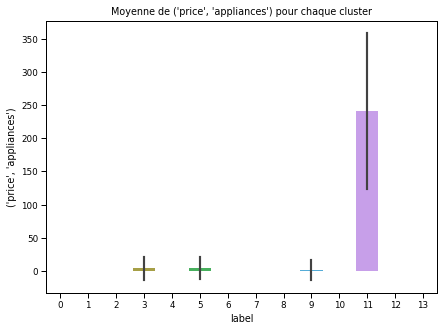

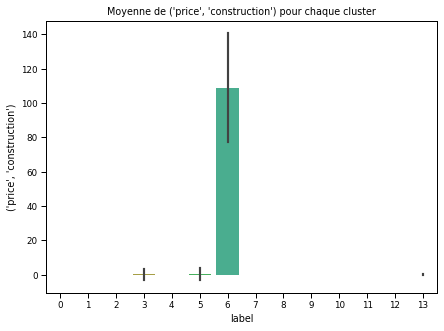

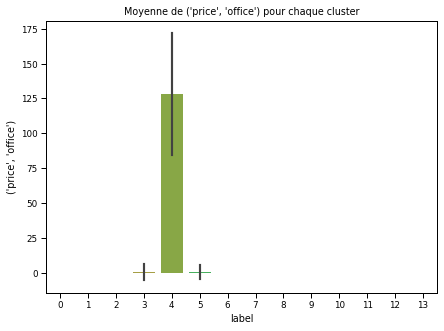

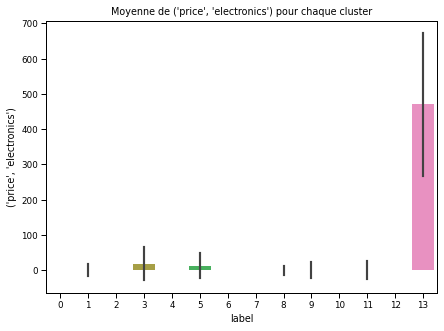

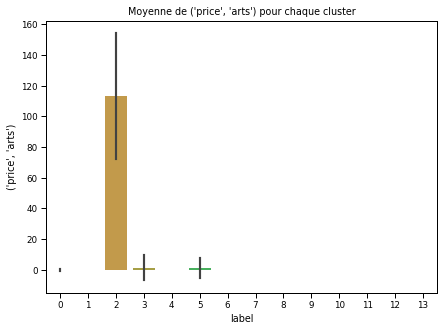

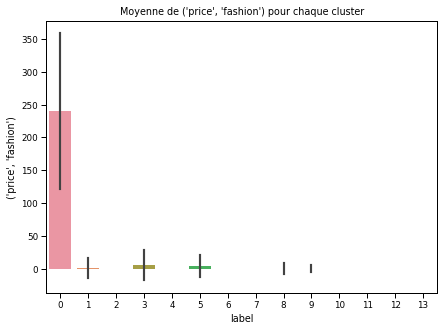

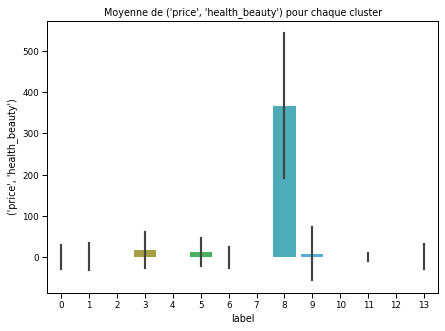

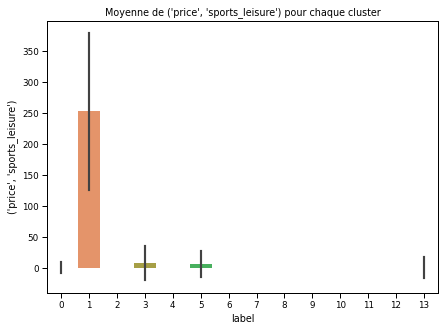

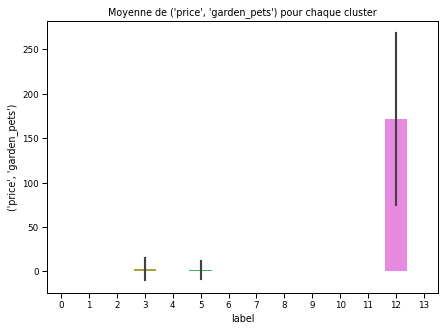

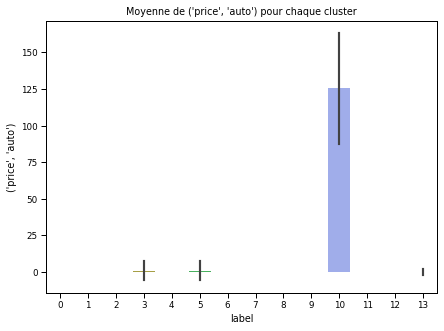

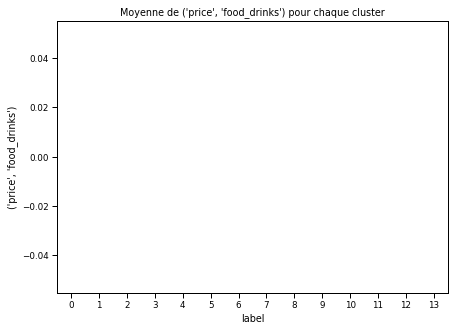

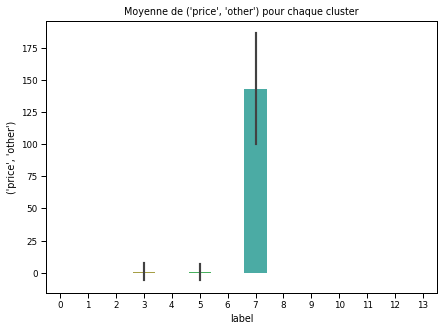

Erreur colonne :  x0_boleto
Erreur colonne :  x0_credit_card
Erreur colonne :  x0_debit_card
Erreur colonne :  x0_voucher


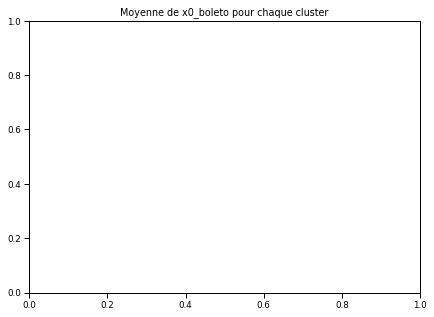

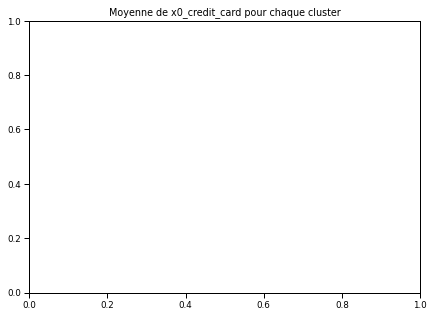

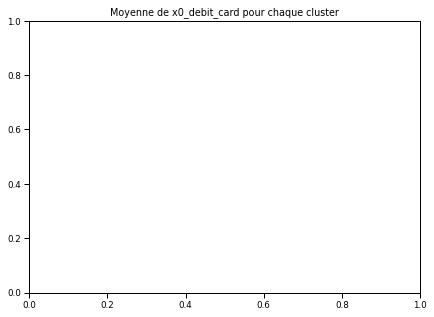

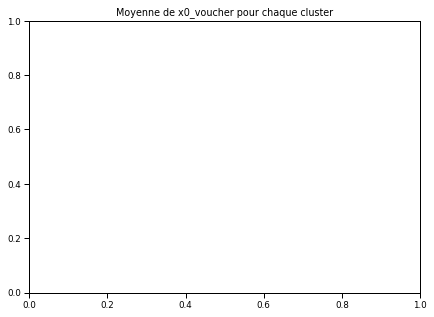

In [87]:
for column in group_columns.columns:
    try:
        plt.figure(figsize=(7,5))
        titre = 'Moyenne de ' + str(column) + ' pour chaque cluster' 
        plt.title(titre)
        sns.barplot(x = 'label',
                    y = column,
                    data = X_tot_2, 
                    ci="sd")
        plt.show()
    except:
        print('Erreur colonne : ', column)

Observation du mode des différents clusters pour chaque feature

In [88]:
X_tot_2.groupby('label').agg(lambda x:x.value_counts().index[0])

,Nb_pdts,Tot_moy_achats,Delai_Moy_Commande,order_purchase_timestamp,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Moy_Paiment,Facilités,geolocation_lat,geolocation_lng,"('price', 'home')","('price', 'appliances')","('price', 'construction')","('price', 'office')","('price', 'electronics')","('price', 'arts')","('price', 'fashion')","('price', 'health_beauty')","('price', 'sports_leisure')","('price', 'garden_pets')","('price', 'auto')","('price', 'food_drinks')","('price', 'other')"
label,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,5.293305,8.0,2018-01-05 13:10:09,21.0,0.0,282.0,5.0,credit_card,1.0,-22.922649,-43.243664,0.0,0.0,0.0,0.0,0.0,0.00,199.0,0.0,0.0,0.0,0.0,0.0,0.00
1,1.0,4.940928,8.0,2018-03-10 15:33:59,11.0,0.0,282.0,5.0,credit_card,1.0,-22.861518,-43.073905,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,139.9,0.0,0.0,0.0,0.00
2,1.0,4.605070,8.0,2018-03-13 20:28:59,14.0,0.0,282.0,5.0,credit_card,1.0,-23.013945,-43.463020,0.0,0.0,0.0,0.0,0.0,99.99,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,1.0,4.092677,16.0,2018-05-09 12:56:56,11.0,4.0,282.0,5.0,credit_card,1.0,-20.344896,-40.288069,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,1.0,4.369448,8.0,2018-07-17 10:06:32,16.0,1.0,235.0,5.0,credit_card,1.0,-23.331436,-46.597022,0.0,0.0,0.0,79.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
5,1.0,4.092677,8.0,2018-02-28 12:44:18,13.0,0.0,282.0,5.0,credit_card,1.0,-23.013945,-43.463020,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
6,1.0,5.010635,8.0,2018-04-02 13:01:06,11.0,0.0,40.0,5.0,credit_card,1.0,-28.387888,-53.916205,0.0,0.0,150.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
7,1.0,4.605070,9.0,2018-02-24 21:24:32,12.0,1.0,270.0,5.0,credit_card,1.0,-20.655379,-43.776331,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,99.99
8,1.0,5.857647,8.0,2017-11-30 10:59:46,16.0,0.0,282.0,5.0,credit_card,1.0,-23.013945,-43.944857,0.0,0.0,0.0,0.0,0.0,0.00,0.0,349.9,0.0,0.0,0.0,0.0,0.00


In [89]:
X_tot_2.groupby('label').agg('mean')

,Nb_pdts,Tot_moy_achats,Delai_Moy_Commande,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Facilités,geolocation_lat,geolocation_lng,"('price', 'home')","('price', 'appliances')","('price', 'construction')","('price', 'office')","('price', 'electronics')","('price', 'arts')","('price', 'fashion')","('price', 'health_beauty')","('price', 'sports_leisure')","('price', 'garden_pets')","('price', 'auto')","('price', 'food_drinks')","('price', 'other')"
label,,,,,,,,,,,,,,,,,,,,,,,
0,1.256040,5.228424,12.882798,15.100252,2.799856,218.159394,4.118013,4.314821,-21.088442,-45.832561,1.172449,0.000000,0.000000,0.000000,0.000000,0.010097,239.951010,1.714677,0.239163,0.000000,0.000000,0.0,0.000000
1,1.504815,5.138844,11.670947,14.866372,2.640449,245.591091,4.192416,3.358949,-22.021338,-46.477684,0.000000,0.000000,0.000000,0.000000,0.920225,0.000000,0.660995,1.710305,252.470891,0.000000,0.000000,0.0,0.000000
2,1.040275,4.637573,11.224714,14.722197,2.729977,266.081922,4.214188,2.800915,-21.855405,-46.204529,0.000000,0.000000,0.000000,0.000000,0.000000,113.146183,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,1.058722,4.184925,21.188995,14.640735,2.860247,253.660039,3.372963,2.874119,-14.242778,-41.238027,27.277501,3.577058,0.217700,0.574704,19.143178,1.310358,5.866496,17.720707,7.973662,2.397377,0.847040,0.0,0.699869
4,1.039942,4.773808,14.822425,14.944658,2.777671,244.269009,4.114533,2.890520,-21.840253,-46.179440,0.000000,0.000000,0.000000,128.154682,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
5,1.045440,4.001092,10.099171,14.809074,2.745854,238.079894,4.323219,2.235740,-22.991867,-47.005656,23.916145,4.393500,0.302339,0.601185,13.312845,1.145560,4.091805,13.644165,6.308515,1.914102,0.952839,0.0,0.791403
6,1.004184,4.643541,11.366806,14.523013,2.715481,152.503487,4.241283,2.993724,-21.801680,-46.212857,0.000000,0.000000,108.870084,0.000000,0.000000,0.000000,0.000000,0.948285,0.000000,0.000000,0.000000,0.0,0.000000
7,1.029634,4.895612,12.202047,14.875539,2.802802,295.421336,4.188847,3.315733,-21.212244,-46.110782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,143.210264
8,1.616352,5.465329,12.136885,14.827229,2.709582,236.393267,4.170644,4.635590,-21.125541,-46.074701,1.584491,0.000000,0.000000,0.000000,0.523892,0.000000,0.230855,367.084203,0.000000,0.000000,0.000000,0.0,0.000000


In [90]:
X_tot_2.groupby('label').agg('mean')['delai_dernier_achat'].tolist()

[218.15939415795168,
 245.59109149277688,
 266.0819221967963,
 253.6600393018148,
 244.26900866217517,
 238.07989405803778,
 152.50348675034869,
 295.42133620689657,
 236.39326674065853,
 237.5203166226913,
 220.4415975885456,
 213.9829515183804,
 244.93640350877192,
 253.11933007676203]

Observations :

Le cluster 9 correspond aux clients qui ont acheté le plus de produits et aux acheteurs majoritaires de la catégorie 'home'
le cluster 3 correspond au client qui ont un long délai de traitement de leur commande et également à ceux qui mettent les plus mauvaises notes en moyenne. Ils ne sont pas attachés à une catégorie de produit en particulier
le cluster 6 correspond au client qui ont fait leur commande le plus récemment et aux acheteurs majoritaires de la catégorie 'construction'
Le cluster 11 correspond aux acheteurs majoritaires de la catégorie 'appliances'
Le cluster 4 correspond aux acheteurs majoritaires de la catégorie 'office'
Le cluster 13 correspond aux acheteurs majoritaires de la catégorie 'electronics'
Le cluster 2 correspond aux acheteurs majoritaires de la catégorie 'arts
Le cluster 0 correspond aux acheteurs majoritaires de la catégorie 'fashion'
Le cluster 8 correspond aux acheteurs majoritaires de la catégorie 'health/beauty'
Le cluster 1 correspond aux acheteurs majoritaires de la catégorie 'sports_leisure'
Le cluster 12 correspond aux acheteurs majoritaires de la catégorie 'garden_pets'
Le cluster 10 correspond aux acheteurs majoritaires de la catégorie 'auto'
Le cluster 7 correspond aux acheteurs majoritaires de la catégorie 'other'
pas de catégorie spécifique d'achat identifiée pour le cluster 5 (cluster qui comprend la moitié de notre échantillon)
Premier bilan:

des clusters d'acheteurs potentiels pour certaines catégories de produits ont été identifiés
les clients avec un long délai de traitement de commande, qui menttent de moins bonnes notes en moyenne, ont été identifiés
le cluster des clients qui achète le plus de produits en quantité a également été identifié
Peut-on aller plus loin?



**latitude et longitude**

In [91]:
graph.columns

Index(['label', 'x_pca', 'y_pca', 'z_pca'], dtype='object')

In [92]:
graph['label'].nunique()

14

In [93]:
graph['colors']=pd.cut(graph['label'], bins=nb_clusters, 
                       labels=['red', 'blue', 'green', 'purple', 
                               'orange', 'darkred', 'lightred', 'beige', 
                               'darkblue', 'darkgreen', 'cadetblue', 'darkpurple',
                               'pink','black'])

In [94]:
len(graph)

75231

In [95]:
if False:
    n = folium.Map()
    n = folium.Map(location=[data['geolocation_lat'].mean().mean(), data['geolocation_lng'].mean().mean()],
                   zoom_start=11)
    for i in range(0,20000):    
        folium.Circle([data.iloc[i]['geolocation_lat'],data.iloc[i]['geolocation_lng']],
                      popup=graph.iloc[i]['label'], 
                      color = graph.iloc[i]['colors']
                      ,radius =500).add_to(n)

Bilan : on n'observe pas de tendance nette sur la localisation des points : regroupement des groupes par quartier ou autre.

# **Essai de Kmeans en supprimant des features**
Peut-on obtenir un autre clustering (éventuellement avec une répartition plus homogène des tailles de clusters) en supprimant des features

In [96]:
X_tot.head()

,Nb_pdts,Tot_moy_achats,Delai_Moy_Commande,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Facilités,geolocation_lat,geolocation_lng,"('price', 'home')","('price', 'appliances')","('price', 'construction')","('price', 'office')","('price', 'electronics')","('price', 'arts')","('price', 'fashion')","('price', 'health_beauty')","('price', 'sports_leisure')","('price', 'garden_pets')","('price', 'auto')","('price', 'food_drinks')","('price', 'other')",x0_boleto,x0_credit_card,x0_debit_card,x0_voucher
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,-0.253368,0.672569,-0.657925,-0.904832,0.125574,-0.844947,0.661670,2.176998,-0.364272,-0.207547,0.652354,-0.204195,-0.108938,-0.174911,-0.249124,-0.195444,-0.226828,-0.288788,-0.241585,-0.176372,-0.159225,0.0,-0.17143,0.0,1.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,-0.253368,-1.754999,-1.049151,-0.716516,-1.395853,-0.824739,-0.114586,-0.701456,-0.409193,-0.195710,-0.254916,-0.204195,-0.108938,-0.174911,-0.249124,-0.195444,-0.226828,-0.056603,-0.241585,-0.176372,-0.159225,0.0,-0.17143,0.0,1.0,0.0,0.0
0000f46a3911fa3c0805444483337064,-0.253368,-0.124183,1.819840,1.166653,0.632716,2.024646,-0.890843,2.176998,-1.227190,-0.709120,-0.254916,-0.204195,-0.108938,2.878255,-0.249124,-0.195444,-0.226828,-0.288788,-0.241585,-0.176372,-0.159225,0.0,-0.17143,0.0,1.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,-0.253368,1.083366,0.254935,0.790019,-0.888711,0.347349,0.661670,1.354583,-0.398218,-0.385152,-0.254916,-0.204195,-0.108938,-0.174911,2.114724,-0.195444,-0.226828,-0.288788,-0.241585,-0.176372,-0.159225,0.0,-0.17143,0.0,1.0,0.0,0.0
0004bd2a26a76fe21f786e4fbd80607f,-0.253368,0.886899,-1.309969,0.790019,0.125574,-0.609182,-0.114586,2.176998,-0.400292,-0.168326,-0.254916,-0.204195,-0.108938,-0.174911,-0.249124,-0.195444,-0.226828,-0.288788,-0.241585,4.721737,-0.159225,0.0,-0.17143,0.0,1.0,0.0,0.0


In [97]:
features_to_drop = ['Delai_Moy_Commande',
                    'heure_achat',
                    'Facilités',
                    'jour_achat', 
                    'Note_Moy_Com']
X_reduce = X_tot.drop(features_to_drop, axis=1)

In [98]:
X_reduce.head()

,Nb_pdts,Tot_moy_achats,delai_dernier_achat,geolocation_lat,geolocation_lng,"('price', 'home')","('price', 'appliances')","('price', 'construction')","('price', 'office')","('price', 'electronics')","('price', 'arts')","('price', 'fashion')","('price', 'health_beauty')","('price', 'sports_leisure')","('price', 'garden_pets')","('price', 'auto')","('price', 'food_drinks')","('price', 'other')",x0_boleto,x0_credit_card,x0_debit_card,x0_voucher
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,-0.253368,0.672569,-0.844947,-0.364272,-0.207547,0.652354,-0.204195,-0.108938,-0.174911,-0.249124,-0.195444,-0.226828,-0.288788,-0.241585,-0.176372,-0.159225,0.0,-0.17143,0.0,1.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,-0.253368,-1.754999,-0.824739,-0.409193,-0.195710,-0.254916,-0.204195,-0.108938,-0.174911,-0.249124,-0.195444,-0.226828,-0.056603,-0.241585,-0.176372,-0.159225,0.0,-0.17143,0.0,1.0,0.0,0.0
0000f46a3911fa3c0805444483337064,-0.253368,-0.124183,2.024646,-1.227190,-0.709120,-0.254916,-0.204195,-0.108938,2.878255,-0.249124,-0.195444,-0.226828,-0.288788,-0.241585,-0.176372,-0.159225,0.0,-0.17143,0.0,1.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,-0.253368,1.083366,0.347349,-0.398218,-0.385152,-0.254916,-0.204195,-0.108938,-0.174911,2.114724,-0.195444,-0.226828,-0.288788,-0.241585,-0.176372,-0.159225,0.0,-0.17143,0.0,1.0,0.0,0.0
0004bd2a26a76fe21f786e4fbd80607f,-0.253368,0.886899,-0.609182,-0.400292,-0.168326,-0.254916,-0.204195,-0.108938,-0.174911,-0.249124,-0.195444,-0.226828,-0.288788,-0.241585,4.721737,-0.159225,0.0,-0.17143,0.0,1.0,0.0,0.0


In [99]:
pca_reduce = PCA(random_state=1)
pca_reduce.fit(X_reduce)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=1,
    svd_solver='auto', tol=0.0, whiten=False)

In [100]:
np.cumsum(pca_reduce.explained_variance_ratio_)[14]

0.948686628723673

In [101]:
X_pca_reduce = pca_reduce.transform(X_reduce)[:,:14]

In [102]:
kmeans_reduce = KMeans(n_clusters=14, 
                verbose=1, 
                random_state=0,
               n_jobs=-1).fit(X_reduce)

In [103]:
silhouette_score(X = X_pca_reduce, labels= kmeans_reduce.labels_)

0.36633240187370397

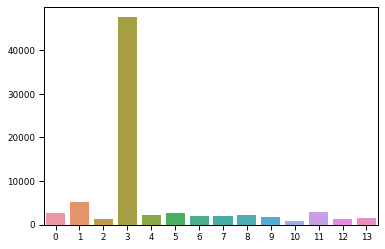

In [104]:
sns.barplot(y = pd.Series(kmeans_reduce.labels_).value_counts().values,
           x = pd.Series(kmeans_reduce.labels_).value_counts().index)

Taille des clusters

In [105]:
pd.DataFrame(kmeans_reduce.labels_, columns=['cluster'])['cluster'].value_counts().sort_values()

10      712
12     1277
2      1328
13     1421
9      1829
7      1850
6      1853
8      2100
4      2218
5      2529
0      2617
11     2815
1      5126
3     47556
Name: cluster, dtype: int64

In [106]:
X_tot_2['label_reduce'] = kmeans_reduce.labels_

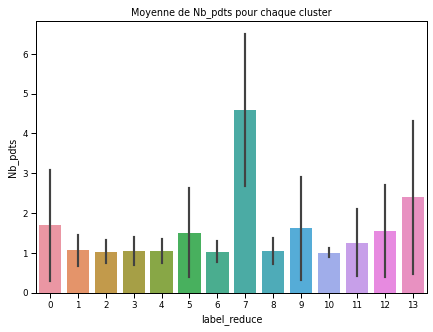

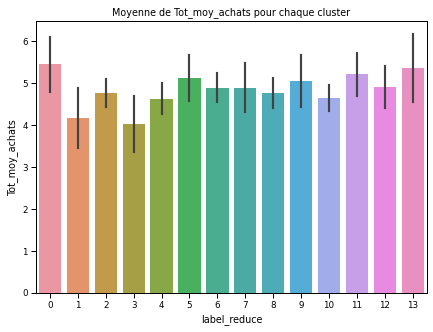

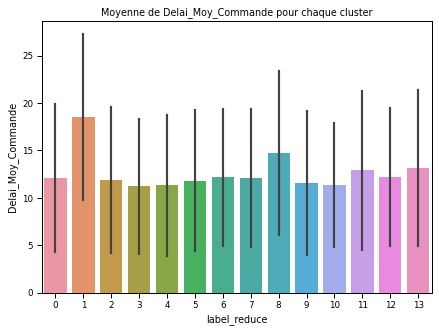

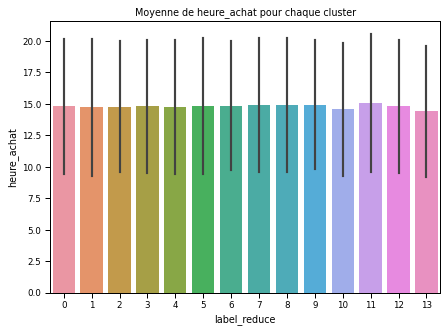

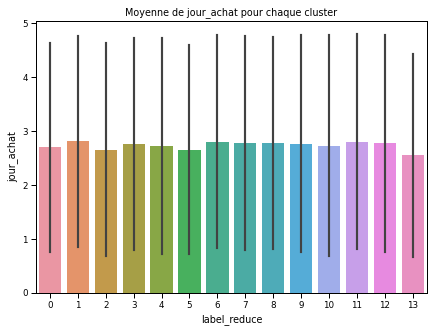

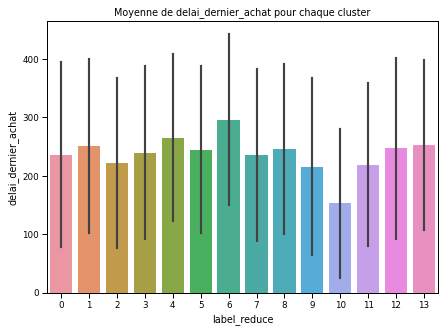

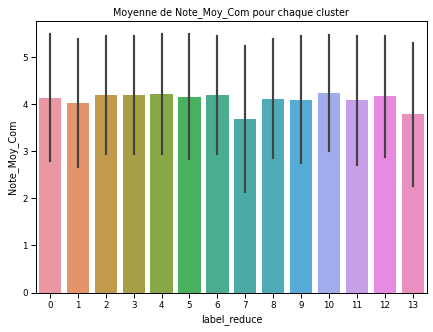

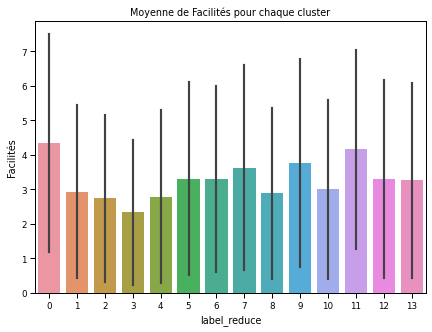

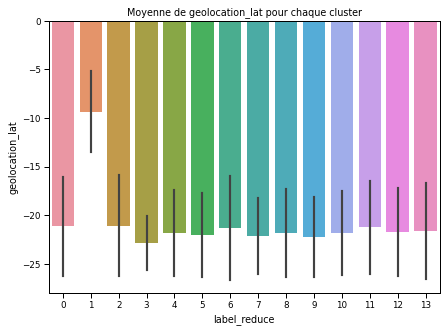

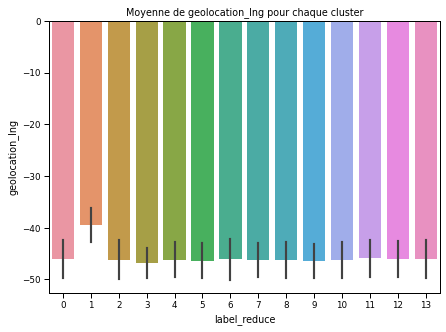

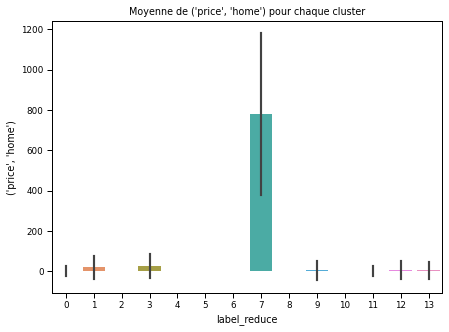

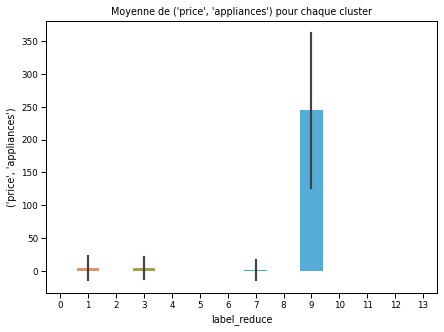

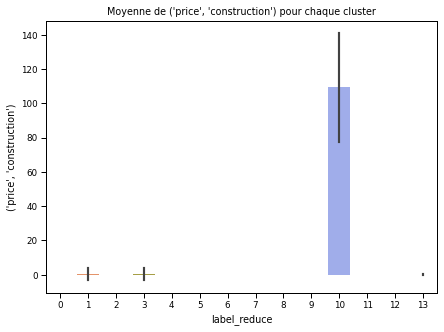

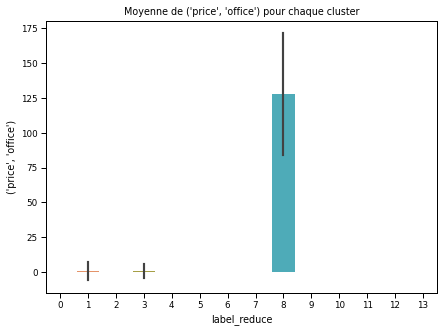

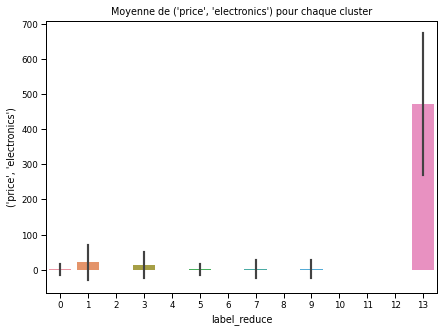

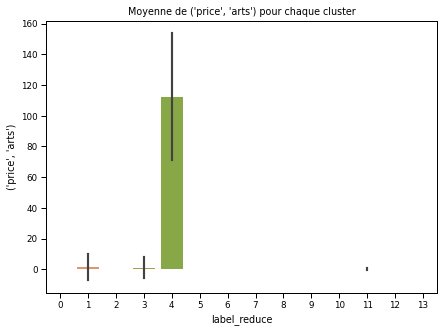

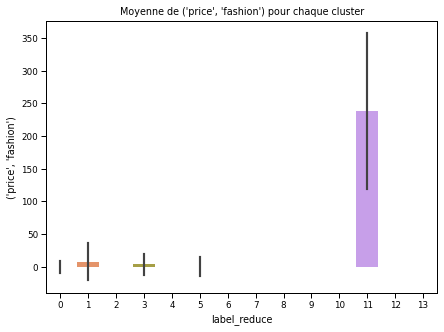

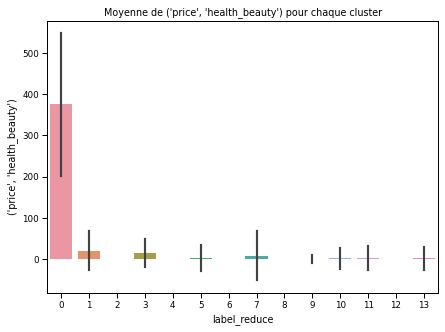

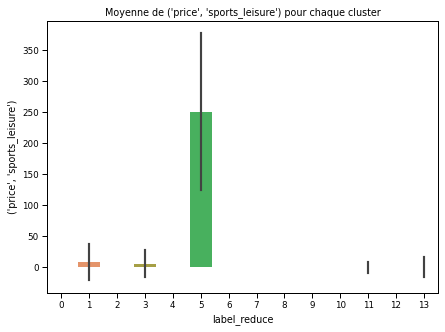

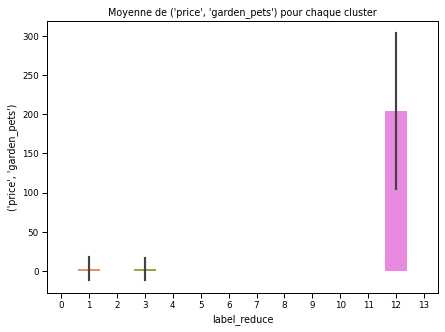

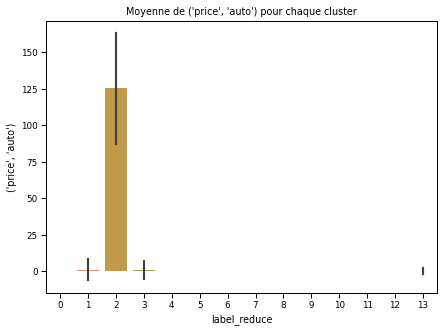

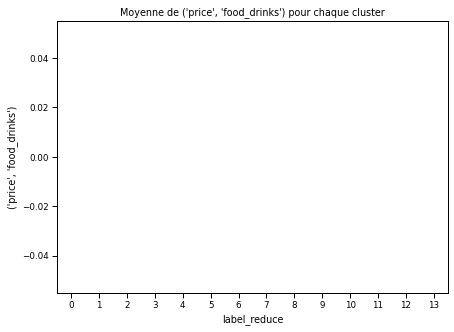

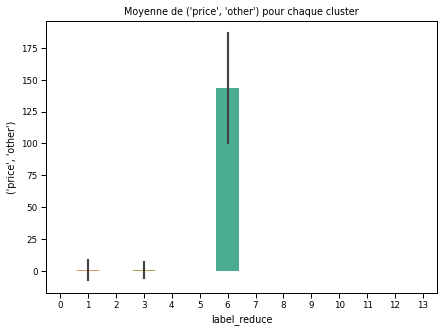

Erreur colonne :  x0_boleto
Erreur colonne :  x0_credit_card
Erreur colonne :  x0_debit_card
Erreur colonne :  x0_voucher


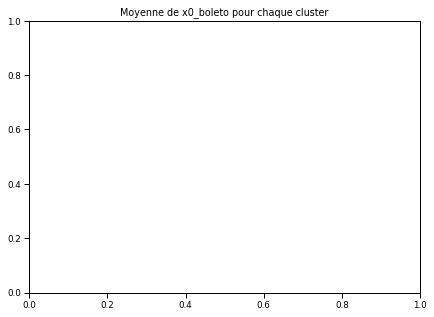

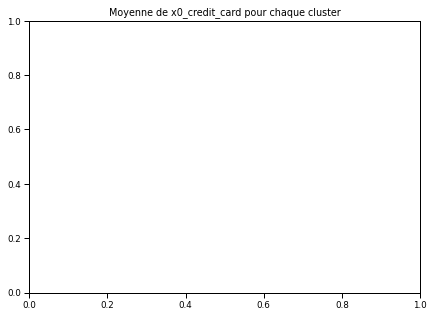

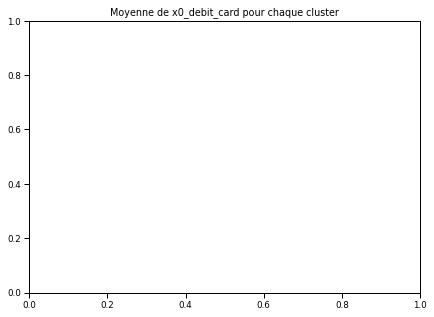

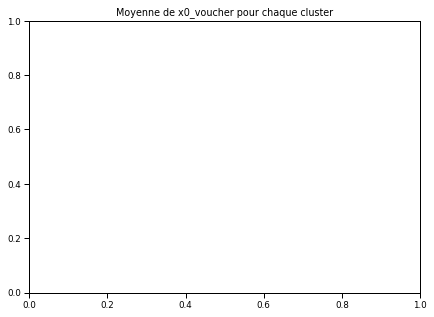

In [107]:
for column in group_columns.columns:
    try:
        plt.figure(figsize=(7,5))
        titre = 'Moyenne de ' + str(column) + ' pour chaque cluster' 
        plt.title(titre)
        sns.barplot(x = 'label_reduce',
                    y = column,
                    data = X_tot_2, 
                    ci="sd")
        plt.show()
    except:
        print('Erreur colonne : ', column)

# **Clusters actionnables**
**Identification des clusters**

In [108]:
cluster = []
for i in range(14):
    cluster.append(data.loc[X_tot_2['label'] == i])

Nombre de clients par cluster

In [109]:
a = 0
for i in range(14):
    b = cluster[i].shape[0]
    a += b
    print('cluster {} : {} clients'.format(i,b))

cluster 0 : 2773 clients
cluster 1 : 2492 clients
cluster 2 : 2185 clients
cluster 3 : 8651 clients
cluster 4 : 2078 clients
cluster 5 : 43420 clients
cluster 6 : 717 clients
cluster 7 : 1856 clients
cluster 8 : 2703 clients
cluster 9 : 1895 clients
cluster 10 : 1327 clients
cluster 11 : 1877 clients
cluster 12 : 1824 clients
cluster 13 : 1433 clients


**Les clients les plus dépensiers**

In [131]:
recap = X_tot_2.drop(['Nb_pdts', 'Tot_moy_achats', 'Delai_Moy_Commande',
       'order_purchase_timestamp', 'heure_achat', 'jour_achat',
       'delai_dernier_achat', 'Note_Moy_Com', 'Moy_Paiment', 'Facilités',
       'geolocation_lat', 'geolocation_lng','label_reduce'], axis=1).groupby('label').sum().sum(axis=1)

In [132]:
recap.columns = ['sum']

In [133]:
recap = pd.DataFrame(recap)

In [134]:
recap.columns = ['sum']

In [135]:
recap['count'] = X_tot_2.groupby('label').count().mean(axis=1)

In [136]:
recap['mean'] = recap['sum'].divide(recap['count'])

In [137]:
recap

,sum,count,mean
label,,,
0,674081.35,2773.0,243.087396
1,637359.94,2492.0,255.762416
2,247224.41,2185.0,113.146183
3,757876.48,8651.0,87.605650
4,266305.43,2078.0,128.154682
5,3099076.65,43420.0,71.374405
6,78739.77,717.0,109.818368
7,265798.25,1856.0,143.210264
8,998551.56,2703.0,369.423441


In [138]:
recap['mean'].sort_index().values.tolist()

[243.08739632167624,
 255.7624157303392,
 113.14618306635917,
 87.60565021384745,
 128.1546823869093,
 71.37440465223585,
 109.8183682008369,
 143.2102640086181,
 369.42344062153455,
 774.6548918205746,
 125.4186586284841,
 246.63807139051772,
 174.70317434210483,
 476.84740404745224]

In [139]:
recap.sort_values(by='mean', inplace=True)

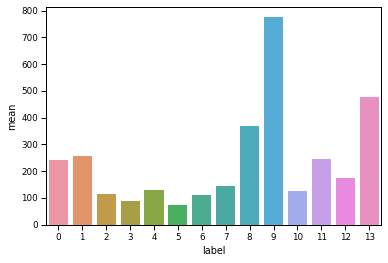

In [140]:
sns.barplot(x = recap.index,
            y = recap['mean'])

Clusters les plus dépensiers : Clusters 9 et 13 il s'agit des catégories qui dépensent le plus dans les catégories "home" et "electronics"

In [146]:
cluster[9].describe().loc[['mean', 'std', 'min','50%','max']]

,Nb_pdts,Tot_moy_achats,Delai_Moy_Commande,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Facilités,geolocation_lat,geolocation_lng,"('price', 'home')","('price', 'appliances')","('price', 'construction')","('price', 'office')","('price', 'electronics')","('price', 'arts')","('price', 'fashion')","('price', 'health_beauty')","('price', 'sports_leisure')","('price', 'garden_pets')","('price', 'auto')","('price', 'food_drinks')","('price', 'other')"
mean,4.61372,4.856906,12.001671,14.912929,2.784697,237.520317,3.670097,3.648329,-22.150443,-46.250365,762.789240,0.606058,0.0,0.0,1.836053,0.0,0.112296,9.311245,0.0,0.0,0.0,0.0,0.0
std,1.90082,0.589585,7.198171,5.333376,1.983586,148.520413,1.554663,2.979232,3.855350,3.322108,408.977262,14.943218,0.0,0.0,22.965976,0.0,4.888403,64.292064,0.0,0.0,0.0,0.0,0.0
min,1.00000,2.647828,-1.000000,0.000000,0.000000,13.000000,1.000000,1.000000,-30.060963,-56.084154,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,4.00000,4.787492,10.000000,15.000000,3.000000,216.000000,4.000000,3.000000,-22.958005,-46.612001,651.600000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,10.00000,6.801283,46.000000,23.000000,6.000000,579.000000,5.000000,10.000000,-2.515916,-35.034567,1992.000000,463.840000,0.0,0.0,419.400000,0.0,212.800000,798.400000,0.0,0.0,0.0,0.0,0.0


In [147]:
cluster[13].describe().loc[['mean', 'std', 'min','50%','max']]

,Nb_pdts,Tot_moy_achats,Delai_Moy_Commande,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Facilités,geolocation_lat,geolocation_lng,"('price', 'home')","('price', 'appliances')","('price', 'construction')","('price', 'office')","('price', 'electronics')","('price', 'arts')","('price', 'fashion')","('price', 'health_beauty')","('price', 'sports_leisure')","('price', 'garden_pets')","('price', 'auto')","('price', 'food_drinks')","('price', 'other')"
mean,2.378925,5.372267,13.051989,14.381019,2.491975,253.119330,3.787276,3.307979,-21.497606,-45.960645,3.971975,0.0,0.009491,0.0,470.319393,0.0,0.0,1.922456,0.568318,0.0,0.055771,0.0,0.0
std,1.919694,0.807898,8.138311,5.158247,1.867122,145.880621,1.503504,2.847520,5.122007,3.701691,47.579094,0.0,0.359266,0.0,201.838613,0.0,0.0,30.215275,16.568649,0.0,2.111215,0.0,0.0
min,1.000000,2.912351,-1.000000,0.000000,0.000000,13.000000,1.000000,1.000000,-30.055084,-56.076818,0.000000,0.0,0.000000,0.0,206.160000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
50%,1.000000,5.521421,11.000000,15.000000,2.000000,230.000000,4.000000,2.000000,-22.944471,-46.622936,0.000000,0.0,0.000000,0.0,399.600000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
max,10.000000,6.840547,46.000000,23.000000,6.000000,579.000000,5.000000,10.000000,-2.533905,-34.939243,975.920000,0.0,13.600000,0.0,996.300000,0.0,0.0,718.800000,583.200000,0.0,79.920000,0.0,0.0


In [148]:
for i in [9,13]:
    print('Nombre clients cluster ',i,': ', cluster[i].shape[0])

Nombre clients cluster  9 :  1895
Nombre clients cluster  13 :  1433


**Les clients les moins dépensiers**

Cluster 5 : les moins dépensiers et qui ont le moins recours aux facilités de paiement => opportunité de leur faire des offres sur les facilités de paiement

In [634]:


In [149]:
cluster[5].describe().loc[['mean', 'std', 'min','50%','max']]

,Nb_pdts,Tot_moy_achats,Delai_Moy_Commande,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Facilités,geolocation_lat,geolocation_lng,"('price', 'home')","('price', 'appliances')","('price', 'construction')","('price', 'office')","('price', 'electronics')","('price', 'arts')","('price', 'fashion')","('price', 'health_beauty')","('price', 'sports_leisure')","('price', 'garden_pets')","('price', 'auto')","('price', 'food_drinks')","('price', 'other')"
mean,1.045440,4.001092,10.099171,14.809074,2.745854,238.079894,4.323219,2.235740,-22.991867,-47.005656,23.916145,4.393500,0.302339,0.601185,13.312845,1.14556,4.091805,13.644165,6.308515,1.914102,0.952839,0.0,0.791403
std,0.337283,0.674257,5.749462,5.288667,1.974634,149.927719,1.121088,2.001625,2.750498,2.741067,56.863190,16.826536,3.422695,5.250755,35.543043,6.83329,17.061315,34.198279,21.549393,10.043829,6.294328,0.0,6.345308
min,1.000000,2.484907,-1.000000,0.000000,0.000000,13.000000,1.000000,1.000000,-30.079022,-56.084484,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,1.000000,4.007333,9.000000,15.000000,3.000000,220.000000,5.000000,1.000000,-23.388032,-46.691860,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,4.000000,6.396913,46.000000,23.000000,6.000000,580.000000,5.000000,10.000000,-7.054993,-39.566524,599.990000,135.600000,54.900000,69.900000,255.960000,60.00000,159.960000,239.960000,147.600000,91.600000,65.550000,0.0,75.000000


In [150]:
print('Nombre clients cluster ',5,': ', cluster[5].shape[0])

Nombre clients cluster  5 :  43420


**Les clients qui ont acheté le plus grand nombre de produits**

Cluster 12 : ils mettent en moyenne une moins bonne note

In [151]:
cluster[9].describe().loc[['mean', 'std', 'min','50%','max']]

,Nb_pdts,Tot_moy_achats,Delai_Moy_Commande,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Facilités,geolocation_lat,geolocation_lng,"('price', 'home')","('price', 'appliances')","('price', 'construction')","('price', 'office')","('price', 'electronics')","('price', 'arts')","('price', 'fashion')","('price', 'health_beauty')","('price', 'sports_leisure')","('price', 'garden_pets')","('price', 'auto')","('price', 'food_drinks')","('price', 'other')"
mean,4.61372,4.856906,12.001671,14.912929,2.784697,237.520317,3.670097,3.648329,-22.150443,-46.250365,762.789240,0.606058,0.0,0.0,1.836053,0.0,0.112296,9.311245,0.0,0.0,0.0,0.0,0.0
std,1.90082,0.589585,7.198171,5.333376,1.983586,148.520413,1.554663,2.979232,3.855350,3.322108,408.977262,14.943218,0.0,0.0,22.965976,0.0,4.888403,64.292064,0.0,0.0,0.0,0.0,0.0
min,1.00000,2.647828,-1.000000,0.000000,0.000000,13.000000,1.000000,1.000000,-30.060963,-56.084154,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,4.00000,4.787492,10.000000,15.000000,3.000000,216.000000,4.000000,3.000000,-22.958005,-46.612001,651.600000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,10.00000,6.801283,46.000000,23.000000,6.000000,579.000000,5.000000,10.000000,-2.515916,-35.034567,1992.000000,463.840000,0.0,0.0,419.400000,0.0,212.800000,798.400000,0.0,0.0,0.0,0.0,0.0


In [152]:
print('Nombre clients cluster ',9,': ', cluster[9].shape[0])

Nombre clients cluster  9 :  1895


**Les longs délais de livraison**

Cluster 3 : ceux qui ont eu un long délai de commande et mettent des mauvaises notes => leur proposer une livraison rapide pour améliorer leur expérience

In [153]:
cluster[3].describe().loc[['mean', 'std', 'min','50%','max']]

,Nb_pdts,Tot_moy_achats,Delai_Moy_Commande,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Facilités,geolocation_lat,geolocation_lng,"('price', 'home')","('price', 'appliances')","('price', 'construction')","('price', 'office')","('price', 'electronics')","('price', 'arts')","('price', 'fashion')","('price', 'health_beauty')","('price', 'sports_leisure')","('price', 'garden_pets')","('price', 'auto')","('price', 'food_drinks')","('price', 'other')"
mean,1.058722,4.184925,21.188995,14.640735,2.860247,253.660039,3.372963,2.874119,-14.242778,-41.238027,27.277501,3.577058,0.21770,0.574704,19.143178,1.310358,5.866496,17.720707,7.973662,2.397377,0.847040,0.0,0.699869
std,0.382291,0.705882,9.354755,5.455711,1.949479,138.557223,1.620475,2.486040,6.693194,3.624377,66.087072,17.169774,3.09607,5.786372,46.892889,8.081519,23.254062,43.178339,27.672269,12.184177,6.408232,0.0,6.485284
min,1.000000,2.484907,-1.000000,0.000000,0.000000,13.000000,1.000000,1.000000,-30.064053,-56.076818,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,1.000000,4.218036,20.000000,15.000000,3.000000,234.000000,4.000000,2.000000,-13.020257,-40.610254,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,4.000000,6.443972,46.000000,23.000000,6.000000,580.000000,5.000000,10.000000,-2.515916,-34.932184,628.900000,169.990000,59.90000,99.000000,323.180000,98.990000,189.990000,339.960000,200.000000,119.990000,79.980000,0.0,89.990000


In [154]:
print('Nombre clients cluster ',3,': ', cluster[3].shape[0])

Nombre clients cluster  3 :  8651


**Les très longs délais de livraison (> 1 mois)**

In [155]:
cluster[3][cluster[3]['Delai_Moy_Commande']>30].describe()

,Nb_pdts,Tot_moy_achats,Delai_Moy_Commande,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Facilités,geolocation_lat,geolocation_lng,"('price', 'home')","('price', 'appliances')","('price', 'construction')","('price', 'office')","('price', 'electronics')","('price', 'arts')","('price', 'fashion')","('price', 'health_beauty')","('price', 'sports_leisure')","('price', 'garden_pets')","('price', 'auto')","('price', 'food_drinks')","('price', 'other')"
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.0,1436.000000
mean,1.048747,4.216259,36.761142,14.827994,2.880223,241.642758,2.088092,2.768106,-17.087301,-42.713294,28.747228,3.722591,0.142228,0.615216,17.547396,1.611664,7.009269,19.132082,8.231184,2.453698,0.769192,0.0,0.450000
std,0.348804,0.722372,4.408819,5.426513,2.013093,106.033134,1.494498,2.448534,7.020201,3.920658,67.080240,18.173235,2.466752,6.075315,47.827024,9.569534,27.643703,46.911410,29.196133,12.065014,6.475891,0.0,5.018427
min,1.000000,2.484907,31.000000,0.000000,0.000000,34.000000,1.000000,1.000000,-30.064053,-56.076818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,1.000000,3.761142,33.000000,11.000000,1.000000,176.000000,1.000000,1.000000,-22.894718,-44.998902,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,1.000000,4.244196,36.000000,15.000000,3.000000,211.000000,1.000000,2.000000,-20.350486,-43.191308,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,1.000000,4.744280,40.000000,19.000000,5.000000,281.000000,3.000000,4.000000,-11.513810,-39.315504,13.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,4.000000,6.443972,46.000000,23.000000,6.000000,579.000000,5.000000,10.000000,-2.523782,-34.932184,628.900000,169.990000,54.400000,99.000000,323.180000,98.990000,189.990000,339.960000,200.000000,99.900000,79.980000,0.0,79.900000


In [156]:
cluster[3][cluster[3]['Delai_Moy_Commande']>30].shape

(1436, 25)

**Les catégories les plus achetées**

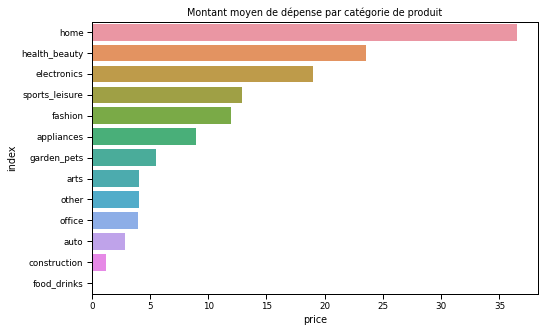

In [157]:
liste_col = [('price', 'home'), ('price', 'appliances'),
       ('price', 'construction'), ('price', 'office'),
       ('price', 'electronics'), ('price', 'arts'), ('price', 'fashion'),
       ('price', 'health_beauty'), ('price', 'sports_leisure'),
       ('price', 'garden_pets'), ('price', 'auto'),
       ('price', 'food_drinks'), ('price', 'other')]
dict_val = {}
for column in liste_col:
    dict_val[str(column).split("'")[3]] = data[str(column)].sum()/data.shape[0]

plt.figure(figsize=(8,5))
plt.title('Montant moyen de dépense par catégorie de produit')
sns.barplot(y = 'index',
            x='price',
            data = pd.DataFrame(dict_val, index=['price']).T.reset_index().sort_values(by='price', ascending=False))

In [158]:
cluster[11].describe().loc[['mean', 'std', 'min','50%','max']]

,Nb_pdts,Tot_moy_achats,Delai_Moy_Commande,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Facilités,geolocation_lat,geolocation_lng,"('price', 'home')","('price', 'appliances')","('price', 'construction')","('price', 'office')","('price', 'electronics')","('price', 'arts')","('price', 'fashion')","('price', 'health_beauty')","('price', 'sports_leisure')","('price', 'garden_pets')","('price', 'auto')","('price', 'food_drinks')","('price', 'other')"
mean,1.594033,5.050799,11.401971,14.999467,2.757592,213.982952,4.116942,3.899840,-22.248957,-46.465026,3.900991,241.265029,0.0,0.0,1.239893,0.0,0.0,0.232158,0.0,0.0,0.0,0.0,0.0
std,1.278545,0.605556,7.350517,5.090911,2.013111,151.637173,1.326413,3.042053,4.106737,3.256607,48.318412,118.074812,0.0,0.0,24.898148,0.0,0.0,10.058083,0.0,0.0,0.0,0.0,0.0
min,1.000000,2.637628,-1.000000,0.000000,0.000000,13.000000,1.000000,1.000000,-30.077584,-56.084154,0.000000,104.900000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
50%,1.000000,5.071981,10.000000,15.000000,3.000000,173.000000,5.000000,3.000000,-23.137753,-46.650235,0.000000,193.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
max,10.000000,6.361302,46.000000,23.000000,6.000000,580.000000,5.000000,10.000000,-2.542192,-34.939870,1112.000000,579.000000,0.0,0.0,624.000000,0.0,0.0,435.760000,0.0,0.0,0.0,0.0,0.0


In [159]:
cluster[7][cluster[7]['Nb_pdts']>2].describe().loc[['mean', 'std', 'min','50%','max']]

,Nb_pdts,Tot_moy_achats,Delai_Moy_Commande,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Facilités,geolocation_lat,geolocation_lng,"('price', 'home')","('price', 'appliances')","('price', 'construction')","('price', 'office')","('price', 'electronics')","('price', 'arts')","('price', 'fashion')","('price', 'health_beauty')","('price', 'sports_leisure')","('price', 'garden_pets')","('price', 'auto')","('price', 'food_drinks')","('price', 'other')"
mean,4.0,3.622135,10.333333,16.333333,3.833333,260.583333,3.666667,3.166667,-21.536464,-46.018999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.200000
std,0.0,0.285580,4.355422,3.797926,1.850471,116.719133,1.775251,2.249579,2.608110,2.777808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.667574
min,4.0,3.178054,4.000000,11.000000,0.000000,65.000000,1.000000,1.000000,-25.437053,-52.203123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.000000
50%,4.0,3.683867,10.000000,16.000000,4.000000,267.500000,5.000000,2.500000,-21.685321,-45.381803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159.200000
max,4.0,4.050044,18.000000,22.000000,6.000000,531.000000,5.000000,8.000000,-16.092803,-43.264048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,229.600000


In [160]:
cluster[7][cluster[7]['Nb_pdts']>2].describe().loc[['mean', 'std', 'min','50%','max']]

,Nb_pdts,Tot_moy_achats,Delai_Moy_Commande,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Facilités,geolocation_lat,geolocation_lng,"('price', 'home')","('price', 'appliances')","('price', 'construction')","('price', 'office')","('price', 'electronics')","('price', 'arts')","('price', 'fashion')","('price', 'health_beauty')","('price', 'sports_leisure')","('price', 'garden_pets')","('price', 'auto')","('price', 'food_drinks')","('price', 'other')"
mean,4.0,3.622135,10.333333,16.333333,3.833333,260.583333,3.666667,3.166667,-21.536464,-46.018999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.200000
std,0.0,0.285580,4.355422,3.797926,1.850471,116.719133,1.775251,2.249579,2.608110,2.777808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.667574
min,4.0,3.178054,4.000000,11.000000,0.000000,65.000000,1.000000,1.000000,-25.437053,-52.203123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.000000
50%,4.0,3.683867,10.000000,16.000000,4.000000,267.500000,5.000000,2.500000,-21.685321,-45.381803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159.200000
max,4.0,4.050044,18.000000,22.000000,6.000000,531.000000,5.000000,8.000000,-16.092803,-43.264048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,229.600000


In [161]:
for i in range(13):
    print('Nombre clients cluster ',i,': ', cluster[i].shape[0])

Nombre clients cluster  0 :  2773
Nombre clients cluster  1 :  2492
Nombre clients cluster  2 :  2185
Nombre clients cluster  3 :  8651
Nombre clients cluster  4 :  2078
Nombre clients cluster  5 :  43420
Nombre clients cluster  6 :  717
Nombre clients cluster  7 :  1856
Nombre clients cluster  8 :  2703
Nombre clients cluster  9 :  1895
Nombre clients cluster  10 :  1327
Nombre clients cluster  11 :  1877
Nombre clients cluster  12 :  1824


**Les clients ayant acheté le plus de produits**


In [162]:
data[data['Nb_pdts'] >=4].shape

(4608, 25)

In [163]:
data.loc[data[data['Nb_pdts'] >=2].index].shape

(5861, 25)

**Les clients les plus satisfaits de leurs produits**

In [164]:
data['Note_Moy_Com'].describe()

count    75231.000000
mean         4.147614
std          1.288243
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Note_Moy_Com, dtype: float64

In [165]:
data[data['Note_Moy_Com']==5].shape

(44234, 25)

In [166]:
data.head()

,Nb_pdts,Tot_moy_achats,Delai_Moy_Commande,order_purchase_timestamp,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Moy_Paiment,Facilités,geolocation_lat,geolocation_lng,"('price', 'home')","('price', 'appliances')","('price', 'construction')","('price', 'office')","('price', 'electronics')","('price', 'arts')","('price', 'fashion')","('price', 'health_beauty')","('price', 'sports_leisure')","('price', 'garden_pets')","('price', 'auto')","('price', 'food_drinks')","('price', 'other')"
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1.0,4.866765,7.0,2018-05-10 10:56:27,10.0,3.0,115.0,5.0,credit_card,8.0,-23.340262,-46.831085,129.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,2.939162,4.0,2018-05-07 11:11:27,11.0,0.0,118.0,4.0,credit_card,1.0,-23.559044,-46.788516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.9,0.0,0.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,1.0,4.234107,26.0,2017-03-10 21:05:03,21.0,4.0,541.0,3.0,credit_card,8.0,-27.543010,-48.634938,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,1.0,5.192957,14.0,2017-11-14 19:45:42,19.0,1.0,292.0,5.0,credit_card,6.0,-23.505588,-47.469820,0.0,0.0,0.0,0.0,180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0004bd2a26a76fe21f786e4fbd80607f,1.0,5.036953,2.0,2018-04-05 19:33:16,19.0,3.0,150.0,4.0,credit_card,8.0,-23.515693,-46.690031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,154.0,0.0,0.0,0.0


In [167]:
data.loc[data[data['Nb_pdts'] >=2].index].shape

(5861, 25)

**clients les moins satisfaits de leurs produits**

In [168]:
data[data['Note_Moy_Com']==1].shape

(7418, 25)

**clustering des clients qui consomment le plus**

In [169]:
X3 = pd.DataFrame(X_pca_tot, index = data.index)

Sélection des clients qui ont acheté plus de 4 produits

In [170]:
dict_silhouette = {}
dict_kmeans_consumers = {}
for i in range(3,15,1):
    dict_kmeans_consumers[i] = KMeans(n_clusters=i, 
                    verbose=1, 
                    random_state=0,
                   n_jobs=-1).fit(X3.loc[data[data['Nb_pdts'] >=4].index])
    dict_silhouette[i] = (silhouette_score(X = X3.loc[data[data['Nb_pdts'] >=4].index],
                         labels= list(dict_kmeans_consumers[i].labels_)))

In [171]:
dict_silhouette

{3: 0.18895858016675554,
 4: 0.22984620881104403,
 5: 0.25919353632993947,
 6: 0.3005567496101742,
 7: 0.32517786115444464,
 8: 0.3394512630018678,
 9: 0.2762869172640674,
 10: 0.2594820359384297,
 11: 0.2486521769457014,
 12: 0.22721493706631554,
 13: 0.2191340122924993,
 14: 0.21490889495243184}

In [172]:
print(max(dict_silhouette.values()))

0.3394512630018678


In [173]:
list(dict_silhouette.keys())[list(dict_silhouette.values()).index(max(dict_silhouette.values()))]

8

In [174]:
X_most_imp_cat = data.copy()[data['Nb_pdts'] >=4]
X_most_imp_cat['label'] = dict_kmeans_consumers[8].labels_

In [175]:
X_most_imp_cat.shape

(4608, 26)

cela représente 4600 clients potentiels

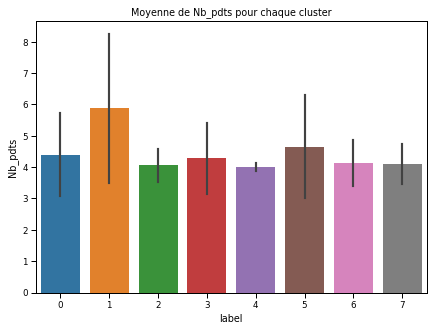

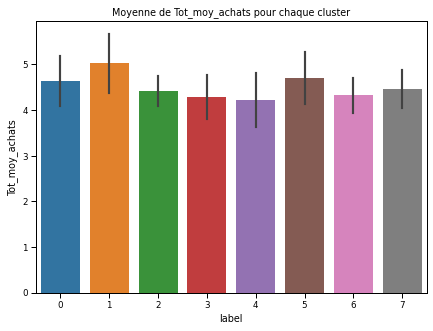

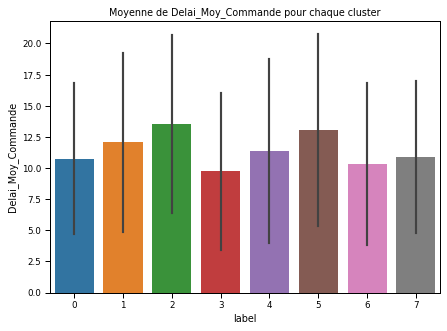

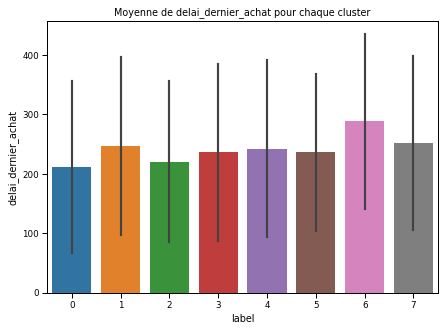

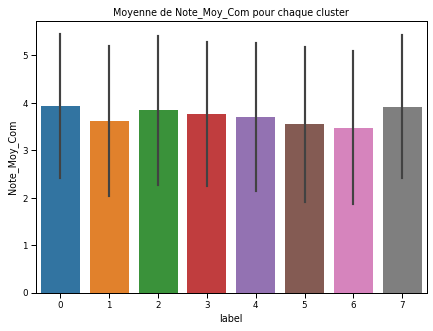

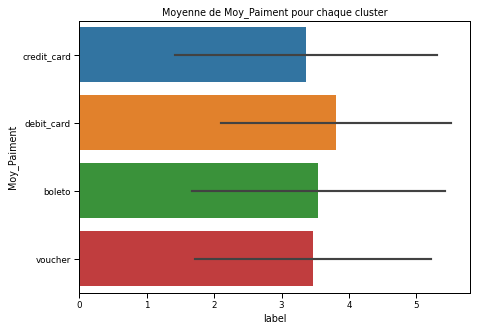

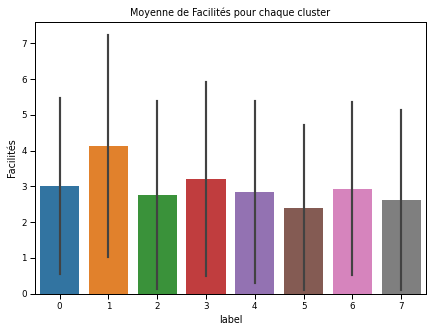

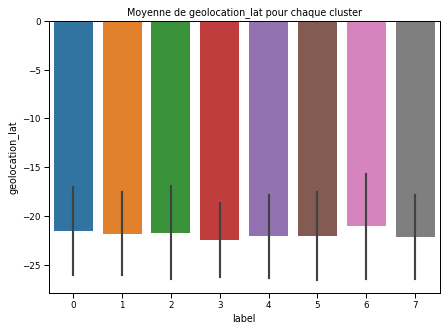

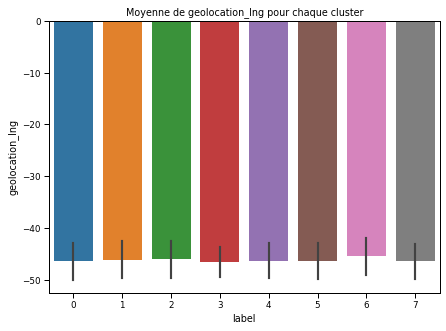

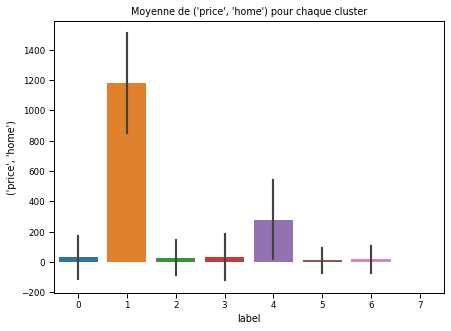

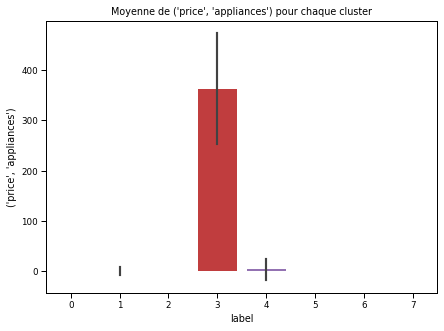

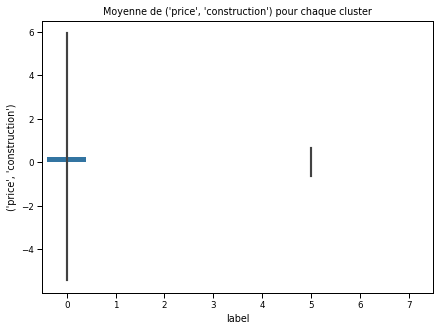

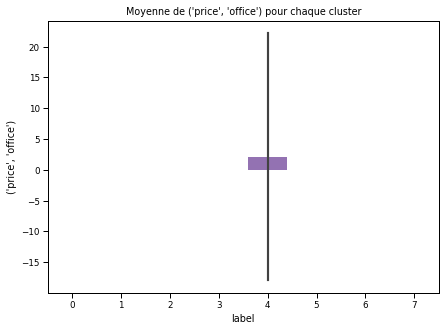

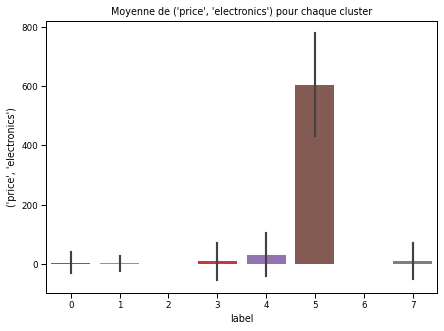

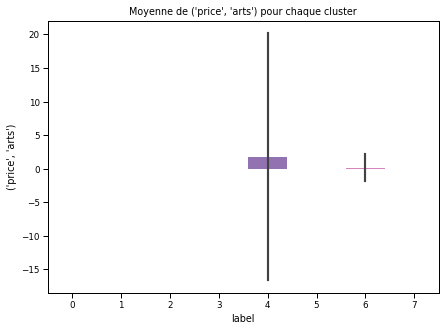

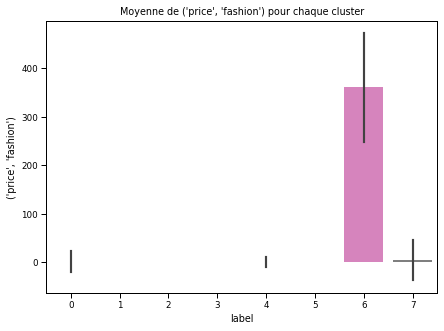

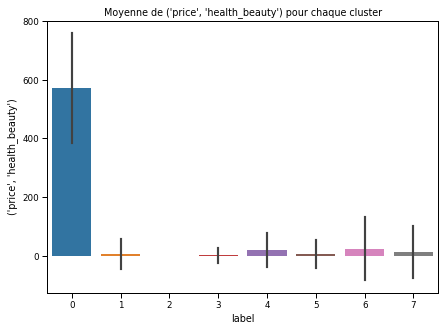

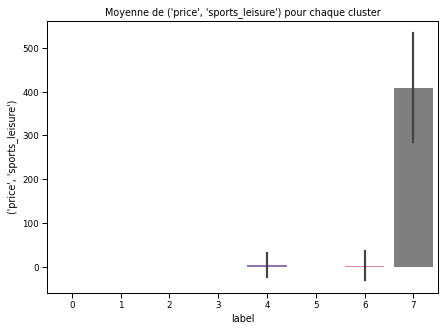

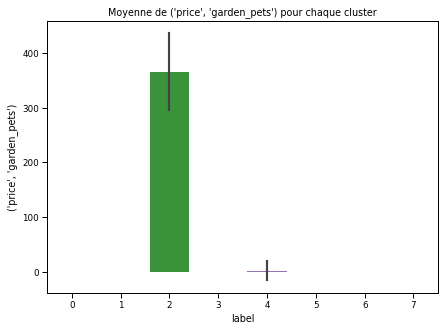

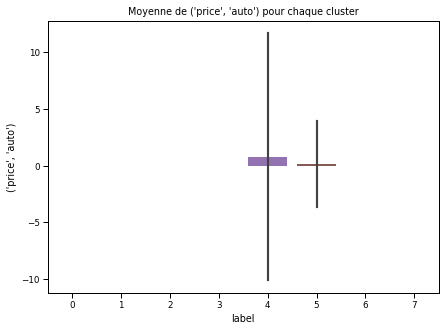

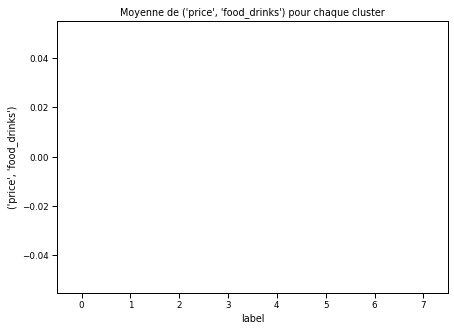

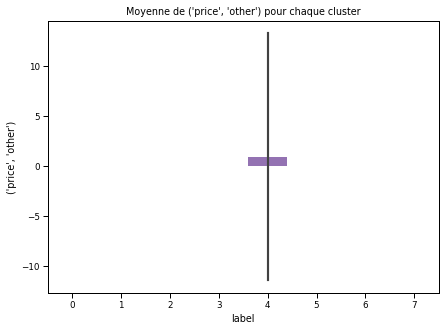

In [176]:
for column in X_most_imp_cat.drop(['order_purchase_timestamp', 'heure_achat', 'jour_achat', 'label'], axis=1).columns:
    plt.figure(figsize=(7,5))
    titre = 'Moyenne de ' + str(column) + ' pour chaque cluster' 
    plt.title(titre)
    sns.barplot(x = 'label',
                y = column,
                data = X_most_imp_cat, 
                ci="sd")
    plt.show()

In [177]:
X_most_imp_cat.shape

(4608, 26)

La différence entre les clusters se fait principalement par les catégories de dépense:

--les individus du cluster 1 a dépensé en moyenne 1200 en produit 'home'

--les individus du du cluster 3 ont dépensé en moyenne plus de 370 dans la catégorie 'appliances'

--les individus du cluster 5 ont dépensé en moyenne 600 dans la catégorie electronics

--les individus du cluster 0 ont dépensé en moyenne 600 dans la catégorie health/beauty

--les individus du cluster 6 ont dépensé en moyenne 350 dans la catégorie fashion

--les individus du cluster 7 ont dépensé en moyenne 400 dans la catégorie sport/leisure

--les individus du cluster 2 ont dépensé en moyenne plus de 400 dans la catégorie "garden" / pets

--les individus du cluster 4 ont dépensé en moyenne 300 dans la catégorie 'home'

on peut par exemple cibler prioritairement ces clients pour des publicités de produits des catégories indiquées ci-dessus

Certaines catégories de produits séduisent davantage de catégories de clients que d'autres, c'est notamment le cas des catégories home, electronics et health beauty qui ont des acheteurs dans tous les clusters. Il y a un levier potentiellement exploitable pour rediriger les clients des autres catégories vers ces catégories



**Caractérisation évolution dans le temps**

--Idée : on pourrait réduire les données en retirant les derniers mois de données et voir si les clusters évoluent ou non : si oui cela veut dire qu’il faut actualiser sur une période de temps plus faible

--Essayer en isolant une région ou autre variable pour voir si le cluster est robuste ou non

In [178]:
data['order_purchase_timestamp'] = data['order_purchase_timestamp'].astype('datetime64')

In [179]:
data['order_purchase_timestamp'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   75231
unique                  75071
top       2018-08-02 12:06:07
freq                        3
first     2017-01-30 10:03:21
last      2018-08-21 09:04:45
Name: order_purchase_timestamp, dtype: object

Pour voir si le clustering est stable:

--on va retirer du jeu de données tous les clients dont le dernier achat date d'il y a moins de n mois avec différents pas


In [180]:
X_tot

,Nb_pdts,Tot_moy_achats,Delai_Moy_Commande,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Facilités,geolocation_lat,geolocation_lng,"('price', 'home')","('price', 'appliances')","('price', 'construction')","('price', 'office')","('price', 'electronics')","('price', 'arts')","('price', 'fashion')","('price', 'health_beauty')","('price', 'sports_leisure')","('price', 'garden_pets')","('price', 'auto')","('price', 'food_drinks')","('price', 'other')",x0_boleto,x0_credit_card,x0_debit_card,x0_voucher
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,-0.253368,0.672569,-0.657925,-0.904832,0.125574,-0.844947,0.661670,2.176998,-0.364272,-0.207547,0.652354,-0.204195,-0.108938,-0.174911,-0.249124,-0.195444,-0.226828,-0.288788,-0.241585,-0.176372,-0.159225,0.0,-0.17143,0.0,1.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,-0.253368,-1.754999,-1.049151,-0.716516,-1.395853,-0.824739,-0.114586,-0.701456,-0.409193,-0.195710,-0.254916,-0.204195,-0.108938,-0.174911,-0.249124,-0.195444,-0.226828,-0.056603,-0.241585,-0.176372,-0.159225,0.0,-0.17143,0.0,1.0,0.0,0.0
0000f46a3911fa3c0805444483337064,-0.253368,-0.124183,1.819840,1.166653,0.632716,2.024646,-0.890843,2.176998,-1.227190,-0.709120,-0.254916,-0.204195,-0.108938,2.878255,-0.249124,-0.195444,-0.226828,-0.288788,-0.241585,-0.176372,-0.159225,0.0,-0.17143,0.0,1.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,-0.253368,1.083366,0.254935,0.790019,-0.888711,0.347349,0.661670,1.354583,-0.398218,-0.385152,-0.254916,-0.204195,-0.108938,-0.174911,2.114724,-0.195444,-0.226828,-0.288788,-0.241585,-0.176372,-0.159225,0.0,-0.17143,0.0,1.0,0.0,0.0
0004bd2a26a76fe21f786e4fbd80607f,-0.253368,0.886899,-1.309969,0.790019,0.125574,-0.609182,-0.114586,2.176998,-0.400292,-0.168326,-0.254916,-0.204195,-0.108938,-0.174911,-0.249124,-0.195444,-0.226828,-0.288788,-0.241585,4.721737,-0.159225,0.0,-0.17143,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffb09418989a0dbff854a28163e47c6,-0.253368,-0.342890,-0.397108,0.790019,1.647001,0.125056,0.661670,-0.701456,-1.513408,-1.519597,-0.254916,-0.204195,-0.108938,-0.174911,-0.249124,-0.195444,0.877443,-0.288788,-0.241585,-0.176372,-0.159225,0.0,-0.17143,1.0,0.0,0.0,0.0
fffea47cd6d3cc0a88bd621562a9d061,-0.253368,-0.201524,2.471883,0.978336,1.647001,0.172209,-0.114586,-0.701456,1.919395,1.981274,-0.254916,-0.204195,-0.108938,-0.174911,-0.249124,-0.195444,-0.226828,0.508382,-0.241585,-0.176372,-0.159225,0.0,-0.17143,0.0,1.0,0.0,0.0
ffff371b4d645b6ecea244b27531430a,-0.253368,0.209036,0.385344,0.036752,-0.888711,2.233466,0.661670,-0.701456,1.998073,-2.620263,-0.254916,-0.204195,-0.108938,-0.174911,-0.249124,-0.195444,-0.226828,-0.288788,-0.241585,-0.176372,4.844631,0.0,-0.17143,0.0,1.0,0.0,0.0


**Préparation jeu de données**

Faisons un test de clustering en retirant les 3 derniers mois du jeu de données (test de faisabilité en retirant tous les clients qui ont fait un achat dans les 3 derniers mois)



In [181]:
data['order_purchase_timestamp'].max()

Timestamp('2018-08-21 09:04:45')

In [182]:
data[data['order_purchase_timestamp'] < '2018-05-21 09:04:45'].shape

(59543, 25)

In [183]:
X_old = data[data['order_purchase_timestamp'] < '2018-05-21 09:04:45'].copy()

In [184]:
categorical_columns = X_old.select_dtypes(['category','object']).columns
numerical_columns = X_old.select_dtypes(['int32','float64']).columns


X_old[numerical_columns] = ss.transform(X_old[numerical_columns])
ohe.fit(X_old[categorical_columns])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [185]:
X_old = pd.merge(X_old[numerical_columns], 
          pd.DataFrame(columns = ohe.get_feature_names().tolist(),
              data = ohe.fit_transform(X_old[categorical_columns])).set_index(X_old.index),
        left_index = True, right_index = True)

**ACP**

In [186]:
X_pca_old = pca_tot.transform(X_old)[:,:18]

**Kmeans**

In [187]:
inertia = {}
dict_kmeans = {}
dict_silhouette = {}
for k in range(5,20):
    kmeans_old = KMeans(n_clusters=k,
                   verbose=1,
                   random_state=0,
                   n_jobs=-1).fit(X_pca_old)
    inertia[k] = kmeans.inertia_
    dict_kmeans[k] = kmeans
    dict_silhouette[k] = silhouette_score(X = X_pca_old, labels= kmeans_old.labels_)
    print('Boucle {} - Silhouette score : {}'.format(k, dict_silhouette[k]))

Boucle 5 - Silhouette score : 0.16704200461598478
Boucle 6 - Silhouette score : 0.1694540652345555
Boucle 7 - Silhouette score : 0.18088899780846682
Boucle 8 - Silhouette score : 0.19367427921466468
Boucle 9 - Silhouette score : 0.19862982228649514
Boucle 10 - Silhouette score : 0.20744633738478155
Boucle 11 - Silhouette score : 0.2146767856527923
Boucle 12 - Silhouette score : 0.2274711044155581
Boucle 13 - Silhouette score : 0.2260568750399384
Boucle 14 - Silhouette score : 0.2386455146488583
Boucle 15 - Silhouette score : 0.1984904452985547
Boucle 16 - Silhouette score : 0.15692415018945008
Boucle 17 - Silhouette score : 0.15664519976535665
Boucle 18 - Silhouette score : 0.1495416496797903
Boucle 19 - Silhouette score : 0.1510554655099424


Le nombre de clusters qui maximise le coefficient de silhouette est toujours 14. Sa valeur est comparable à celle obtenue pour le jeu complet



**Représentation**

In [ ]:
X_old.shape

In [ ]:
kmeans_old.labels_.shape

In [ ]:
X_tot_old = data[data['order_purchase_timestamp'] < '2018-05-21 09:04:45'].copy().copy()
X_tot_old['label'] = kmeans_old.labels_

In [ ]:
for column in group_columns.columns:
    try:
        plt.figure(figsize=(7,5))
        titre = 'Moyenne de ' + str(column) + ' pour chaque cluster' 
        plt.title(titre)
        sns.barplot(x = 'label',
                    y = column,
                    data = X_tot_old, 
                    ci="sd")
        plt.show()
    except:
        print('Erreur colonne : ', column)

On constate que les différentes observations constatées dans le précédent clustering sont conservées, notamment:

--cat 8 : les plus dépensiers pour home et ceux qui ont acheté le plus de produits

--cat 3 : les 2e plus dépensiers et les plus dépensiers dans la catégorie électronics

--cat 2 : délai moyen de commande plus élevé que les autres et moyenne de notes commentaires plus basse que la moyenne

pour le reste les catégories semblent représentées de façon similaire
On constate par contre que différentes valeurs évoluent sensiblement comme les notes moyennes de commentaires (de 3,1 à 3,4 par exemple pour la catégorie la moins satisfaite). 